# SchoolERP

# Problem Statement

Educational institutions often face challenges in resource allocation, staffing, and planning due to fluctuating student enrollment numbers. Accurate forecasting of student enrollment can significantly improve decision-making processes, enhance operational efficiency, and optimize resource utilization.

# Main Objective

1. Student Enrollment Forecasting Purpose: Analyze historical enrollment trends to predict demand for different classes or grades in upcoming years, helping administrators plan capacity and resources accordingly. Methods: Time-series forecasting or trend analysis to predict enrollment numbers.

# Specific Objectives

1. Predicting Student Performance Purpose: Use historical data (like attendance, grades, and behavior records) to predict student performance and identify students who may need extra support. Methods: Regression models, ensemble methods, and neural networks could be used to predict academic outcomes based on various factors.
2. Resource Allocation and Planning Purpose: Based on enrollment trends, the school could use ML to predict future student numbers and allocate resources, like classrooms and teachers, accordingly. This could also help in budget forecasting. Methods: Forecasting models like ARIMA, Prophet, or even linear regression on seasonal enrollment data.
3. Fee Payment and Financial Insights Purpose: ML could analyze payment histories and trends to predict late payments, allowing for targeted reminders or flexible payment options. This might also include insights into financial aid needs. Methods: Classification models to predict late payment risks or clustering for fee categorization.

# Imports

In [5]:
import re
import joblib
import pickle
import warnings
import numpy as np
import mpl_toolkits
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import SVR
from tensorflow import keras
from datetime import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Dense
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from keras import models, layers, optimizers
from tensorflow.keras.optimizers import Adam
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from matplotlib.animation import FuncAnimation
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, \
accuracy_score, f1_score, roc_curve, auc, mean_absolute_error, mean_squared_error, r2_score

# Data Understanding

In [11]:
pp_1 = pd.read_excel("data/utumishi.xlsx", sheet_name = 'PP1', skiprows = 1)
pp_1 = pp_1.loc[:, :'STATUS']
pp_1

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
0,PP1,1678,DYLAN MWAURA MUNGAI,D,Samuel Mwaura,0722961925,PP1 Ruby,TR Esther,Present
1,PP1,1687,ALBERT NJENGA KINENE,D,Joshua Kinene,NaN,PP1 Lily,TR Virginia,Present
2,PP1,1745,ETHAN WANJAU WANJIKU,D,NaN,NaN,NaN,NaN,NaN
3,PP1,1756,JOSEPH NDUNGU KARARI,D,Jonh Karari,NaN,NaN,TR Ruth,Present
4,PP1,1836,NELLY WAMBUI,D,Wilson Kamaneu,NaN,PP1 Ivory,TR Ruth,Present
...,...,...,...,...,...,...,...,...,...
141,PP1,12098,KRYSTAL NJERI MUNYWE,D,John Michau,0717178010,PP1 Ivory,Tr Ruth,Present
142,PP1,12129,ABIGAIL WAKARURA NJUGUNA,D,Henry Njunguna,0725026893,PP1,NaN,Present
143,PP1,12227,DARIAN NYORO KAGIA,D,NaN,NaN,NaN,NaN,NaN
144,PP1,12258,HENRY WAIGWA KIMANI,D,Ann Kimani,0710625552,PP1 Ruby,Tr Esther,Present


In [12]:
pp_2 = pd.read_excel("data/utumishi.xlsx", sheet_name = 'PP2', skipfooter = 1)
pp_2

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
0,PP2,1464.0,SAMMY KANYUA KIRIBA,D,Joseph Kiriba,0720670271,PP2 Lily,TR.Sarah,PRESENT
1,PP2,1524.0,RYAN KAMAU KUNGU(TR),D,NaN,NaN,NaN,NaN,NaN
2,PP2,1658.0,NANCY NJAMBI MWAURA,D,Miren Wanjiru,0798937252,PP2 Ruby,TR.Tabitha,PRESENT
3,PP2,1659.0,HOPE WANJA NDUATI,D,Wilson Ndungu,0724672975,PP2 Ivory,TR.Mary,PRESENT
4,PP2,1660.0,SHANNEL MARIE NJUGUNA,D,George Njuguna,0729445387,PP2 Lily,TR.Sarah,PRESENT
...,...,...,...,...,...,...,...,...,...
124,PP2,11890.0,KEYSHIA GATHONI NJERI,D,IRENE MUIRURI,0729682772,PP2 Ruby,TR.Tabitha,PRESENT
125,PP2,11891.0,NATASHA WAMBUI,D,WILLY THUITAI,0727457508,PP2 Lily,TR.Sarah,PRESENT
126,PP2,11894.0,KIMI NJERI NJOROGE,D,SIMON NJOROGE,0720857455,PP2 Ivory,TR.Mary,PRESENT
127,PP2,11905.0,LAQUEEN MBUTU,D,CAROLINE NJAHIRA,NaN,NaN,NaN,PRESENT


In [13]:
grade_1 = pd.read_excel("data/utumishi.xlsx", sheet_name = 'GRADE 1', skiprows = 1, skipfooter = 4)
grade_1

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS,DOB
0,1,1269,Stephen Kibe,D,ANN KIBE,702120317.0,1 IVORY,TR. JOSEPHINE,PRESENT,17/5/2017
1,1,1270,Samuel Burugu,D,ANN KIBE,702120317.0,1 IVORY,TR. JOSEPHINE,PRESENT,17/5/2017
2,1,1386,Adrian Karuga Ngure,D,JOHN KARUGA,715675717.0,1 LILY,TR. RUTH,PRESENT,24/4/2017
3,1,1394,NATHANIEL NGUNYU MBOGO,D,GEORGE MBUGU,729208160.0,1 LILY,TR. RUTH,PRESENT,30/8/2017
4,1,1403,ANDREW ICHUGWA NYOKABI,D,CATHERINE WAMBUI,720308961.0,1 RUBY,TR. MARY,PRESENT,16/2/2018
...,...,...,...,...,...,...,...,...,...,...
176,1,12281,GRIFFIN KIPRUTO,D,VICTOR KIPROTICU,706427263.0,1 LILY,TR RUTH,PRESENT,2016-11-11 00:00:00
177,1,12282,PENDO LESLLEY,D,VIOLET AWINO,720116459.0,1 LILY,TR RUTH,PRESENT,19/4/2017
178,1,12283,BRIELLE WEMA.,D,JOB NDEGWA,721379291.0,1 LILY,TR RUTH,PRESENT,2017-11-04 00:00:00
179,1,12284,ANDREW TIBI,D,TERESIAH WAWERU,705286731.0,1 LILY,TR RUTH,PRESENT,23/4/2018


In [14]:
grade_2 = pd.read_excel("data/utumishi.xlsx", sheet_name = 'GRADE 2')
grade_2

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS,DOB
0,2,1133.0,Joshua Njau,D,Jane Wangari Njau,729647358.0,2 Violet,TR Violet,Present,NaN
1,2,1230.0,Petitah Gachiku Njunge,D,Margret Wamburu,720389709.0,2 Ivory,TR Mary,Present,NaN
2,2,1236.0,Hannah wanjiru Wangechi,D,Sarah Wangechi,721857978.0,2 Lily,TR Josphine,Present,NaN
3,2,1237.0,Dylan ndungu Chege,D,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1238.0,Everswine njeru Mwangi,D,Peter Mwangi,728808475.0,2 Violet,TR Violet,Present,NaN
...,...,...,...,...,...,...,...,...,...,...
204,2,NaN,Dorcas Njeri,D,David Njoroge,723494125.0,2 Lily,TR Josphine,Present,NaN
205,2,NaN,Adrian Kariuki,D,Serah Kariuki,729579813.0,2 Ivory,TR Mary,Present,NaN
206,2,NaN,Margaret Wangechi,NaN,Flaciah Wairimu,797920811.0,2 Lily,TR Josphine,Present,NaN
207,2,NaN,Ethan Gatimu,NaN,Carolyne Njenga,720326190.0,2 Lily,TR Josphine,Present,NaN


In [15]:
grade_3 = pd.read_excel("data/utumishi.xlsx", sheet_name = 'GRADE 3')
grade_3

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
0,3,1040.0,Owen Njau,D,TRANSFERED,NaN,NaN,NaN,Transferred
1,3,1123.0,Lucy Wairimu,D,MARY NJOKI,725458705.0,3 IVORY,TR TERESIAH,PRESENT
2,3,1124.0,Lewis Githogori,D,LILIAN GACHOGO,721362093.0,3 IVORY,TR TERESIAH,PRESENT
3,3,1125.0,Ellah Murugi,D,SIMON WAIRI,722454418.0,3 VIOLET,TR JUDY,PRESENT
4,3,1126.0,Dylan Davis Macharia,D,CHEGE MBUGUA,720572731.0,3 IVORY,TR TERESIAH,PRESENT
...,...,...,...,...,...,...,...,...,...
170,3,11983.0,TREACY WAMBUI,D,PAUL NJOROGE,727822631.0,3 RUBY,TR EUNICE,PRESENT
171,3,1207.0,MALIK MWANGI,D,VERONICA WANGU,708853698.0,3 RUBY,TR EUNICE,PRESENT
172,3,12076.0,JAYDEN KARIUKI,D,MONICA NJENGA,728473002.0,3 RUBY,TR EUNICE,PRESENT
173,3,NaN,VIVIAN WANJIRU,D,LUCIA NJOKI,721282419.0,3 LILY,TR ALICE,PRESENT


In [16]:
grade_4 = pd.read_excel("data/utumishi.xlsx", sheet_name = 'GRADE 4')
grade_4

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
0,4,1780,JAYDEN PETER KIN,D,Irene Njeri,0729682772,4 Violet,Tr. Monica,Present
1,4,11173,Cynthia Nyambura Kinyanjui,D,Beatrice Wambui,0746794822,4 Lily,Tr. Emma,Present
2,4,11216,Wayne Travis,D,Charles Muchuri,NaN,4 Ruby,Tr. Carol,Present
3,4,11297,Bracha Wangari,D,Willfred Mwangi,0707419270,4 Lily,Tr. Emma,Present
4,4,11298,David Chege,D,NaN,NaN,NaN,NaN,TRANSFERRED
...,...,...,...,...,...,...,...,...,...
192,4,11957,DAVID WAHOME,D,JOSEPHAT GICHUKI,0720792628,4 Ivory,Mr.Asiago,Present
193,4,11958,HARRY KIMANI,D,EDWARD KURIA,0725773991,4 Ivory,Mr.Asiago,Present
194,4,11959,ANGELA WANJIRU,D,DAMARIS WANYIKA,0713894684,4 Ivory,Mr.Asiago,Present
195,4,11960,TANYA BLESSING,D,Richard Chege,0724527746,4 Ivory,Mr.Asiago,Present


In [17]:
grade_5 = pd.read_excel("data/utumishi.xlsx", sheet_name = 'GRADE 5')
grade_5

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
0,5,11114,Daisy Muthoni,D,NaN,NaN,NaN,NaN,TRANSFERED
1,5,11115,Linda Wanjiku,D,Evanson Kimemia,721809667.0,5 Violet,TR victor,Present
2,5,11116,Sammy Macharia,D,Gilbert Kamau,724571099.0,5 Lily,TR Faith,Present
3,5,11117,Samuel Kamanu,D,John Paul,708632700.0,5 Violet,TR victor,Present
4,5,11118,Jayden John Kariuki,D,Phyllis Njoki,722106400.0,5 Ruby,TR Esther,Present
...,...,...,...,...,...,...,...,...,...
186,5,11995,TATTYANA NJOKI,D,Nicholas Mwangi,721860414.0,5 Lily,Tr.Faith,Present
187,5,11996,MARY NJOKI,D,John Karari,725883885.0,5 Lily,Tr.Faith,Present
188,5,11997,MARTIN MATI,D,Paul Gatere,722889868.0,5 Lily,Tr.Faith,Present
189,5,11998,SANDRA NJAMBI,D,David Thiga,729098649.0,5 Lily,Tr.Faith,Present


In [18]:
grade_6 = pd.read_excel("data/utumishi.xlsx", sheet_name = 'GRADE 6')
grade_6

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
0,6,10756,Joseph Muthinji,D,Benson Mbugua,722253119.0,6 Violet,Mr. Chege,Present
1,6,10981,Aimee Muthoni,D,George Kigotho,722486275.0,6 Ivory,Tr. Michael,Present
2,6,10982,Winner Munene,D,Peter Ng`ang`a,721539840.0,6Lily,Tr. John,Present
3,6,10983,Mish Samuel Njoroge,D,Kate Njoki,710731236.0,6 Ivory,Tr. Michael,Present
4,6,10984,Favour Njambi,B,Samuel Njenga,720532842.0,6Lily,Tr. John,Present
...,...,...,...,...,...,...,...,...,...
144,6,11876,JOSEPH MUNGAI WANJIRU,B,Wanjiru Mungai,717106443.0,6 Ivory,Tr. Michael,Present
145,6,11925,TRAVIS MUCHUGIA KABUU,D,Jane Waithera,720732231.0,6 Ruby,Tr. Njeri,Present
146,6,11927,MAXWELL NJOROGE,B,Eunice Wanjiru,722992517.0,6 Ivory,Tr. Michael,Present
147,6,11935,ROMNEY KYAMBU,D,Mercy Nyokabi,724940922.0,6 Ivory,Tr. Michael,Present


In [19]:
grade_7 = pd.read_excel("data/Updated grade 7& 8.xlsx", skiprows = 2, sheet_name = '7')
grade_7 = grade_7.drop(columns=['Sno'])
grade_7

,ADM_NO,STUDENT_NAME,CLASS,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS,DOB,GENDER
0,254,Victor Kiruri,7,B,Richard Mbugua,722450097,7 Tana,TR.Emmah,Present,22/10/2011,M
1,255,Emmanuella Baraka,7,B,Meshack Kiarie,725809292,7Tana,TR.Emmah,Present,23/10/2011,F
2,256,Precious Ngendo,7,D.,Michael Ng'ang'a,721963525,7 Nile,Mr.Mwangi,Present,4/2/2012,F
3,257,Krisha Njeri,7,D,Justin Mwangi,721321327,7 Athi,TR.Lydia,Present,15/4/2011,F
4,258,Victor Kimani,7,D,Simon Kihara,721471568,7 Chania,Mr.Ng'ang'a,Present,8/3/2012,M
...,...,...,...,...,...,...,...,...,...,...,...
251,543,KEISHA THAMI GAKO,7,B,Amos Gakuo,726373228,7 Tana,Tr. Emmah,Present,29/4/2011,F
252,545,JABARI GAKUNJU,7,B,Caroline Karanja,726477463,7 Chania,Mr. Ng'ang'a,Present,6/11/2010,M
253,546,KESSY KIMBERLY NEEMA,7,D,Violet Nelly,720116459,7 Tana,TR.Emmah,Present,25/5/2012,F
254,516,MARK P. KABACHIA,7,B,Bernard Kiratu,721663785,7 Chania,Mr.Ng'ang'a,Present,15/1/2012,M


In [20]:
grade_8 = pd.read_excel("data/Updated grade 7& 8.xlsx", skiprows = 1, sheet_name = '8')
grade_8

,ADM_NO,STUDENT_NAME,CLASS,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS,DOB
0,1,Kathy Waringa,8,B,Timothy Ndegwa,721816708.0,8 Chania,TR.Vivian,Present,14/6/2010
1,2,Winfrey Wangari,8,B,Rebecca Wanjiru,726369053.0,8 Galana,Mr. Opiyo,Present,13/9/2010
2,3,Ian Njoroge Njuguna,8,B,Ruth Wanjiku,721817755.0,8 Chania,TR.Vivian,Present,2010-02-02 00:00:00
3,4,Rosemary Wanjiru,8,B,Peter Ndungu,721467810.0,8 Athi,TR.David,Present,22/2/2011
4,5,Eric Kariuki,8,B,Mary Wanjiku,720246830.0,8 Nile,Mr.Wanjala,Present,15/3/2010
...,...,...,...,...,...,...,...,...,...,...
230,541,LEWIS NGARU WACHIRA,8,B,George Gichimo,726261305.0,8 Chania,TR.Vivian,Present,16/4/2010
231,542,JAIME MUTHIORA MWANGI,8,B,David Mwangi,721426072.0,8 Galana,Mr Opiyo,Present,27/10/2011
232,544,JOEL CHAHILU CHALA,8,B,Jackeline Luvanda,723100910.0,8 Chania,TR.Vivian,Present,29/6/2010
233,245,STELLA NYAMBURA MUNGAI,8,B,Geoffrey Mungai,725753266.0,8 Galana,Mr Opiyo,Present,23/1/2011


In [21]:
dataframes_to_concat = [pp_1, pp_2, grade_1, grade_2, grade_3, grade_4, grade_5, grade_6, grade_7, grade_8]

schoolerp = pd.concat(dataframes_to_concat, ignore_index=True)
schoolerp

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS,DOB,GENDER
0,PP1,1678.0,DYLAN MWAURA MUNGAI,D,Samuel Mwaura,0722961925,PP1 Ruby,TR Esther,Present,NaN,NaN
1,PP1,1687.0,ALBERT NJENGA KINENE,D,Joshua Kinene,NaN,PP1 Lily,TR Virginia,Present,NaN,NaN
2,PP1,1745.0,ETHAN WANJAU WANJIKU,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PP1,1756.0,JOSEPH NDUNGU KARARI,D,Jonh Karari,NaN,NaN,TR Ruth,Present,NaN,NaN
4,PP1,1836.0,NELLY WAMBUI,D,Wilson Kamaneu,NaN,PP1 Ivory,TR Ruth,Present,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1863,8,541.0,LEWIS NGARU WACHIRA,B,George Gichimo,726261305.0,8 Chania,TR.Vivian,Present,16/4/2010,NaN
1864,8,542.0,JAIME MUTHIORA MWANGI,B,David Mwangi,721426072.0,8 Galana,Mr Opiyo,Present,27/10/2011,NaN
1865,8,544.0,JOEL CHAHILU CHALA,B,Jackeline Luvanda,723100910.0,8 Chania,TR.Vivian,Present,29/6/2010,NaN
1866,8,245.0,STELLA NYAMBURA MUNGAI,B,Geoffrey Mungai,725753266.0,8 Galana,Mr Opiyo,Present,23/1/2011,NaN


In [22]:
schoolerp.columns

Index(['CLASS', 'ADM_NO', 'STUDENT_NAME', 'D/B', 'PARENT_NAME', 'TELEPHONE',
       'STREAM', 'CLASSTEACHER', 'STATUS', 'DOB', 'GENDER'],
      dtype='object')

In [23]:
schoolerp.head(10)

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS,DOB,GENDER
0,PP1,1678.0,DYLAN MWAURA MUNGAI,D,Samuel Mwaura,0722961925,PP1 Ruby,TR Esther,Present,NaN,NaN
1,PP1,1687.0,ALBERT NJENGA KINENE,D,Joshua Kinene,NaN,PP1 Lily,TR Virginia,Present,NaN,NaN
2,PP1,1745.0,ETHAN WANJAU WANJIKU,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PP1,1756.0,JOSEPH NDUNGU KARARI,D,Jonh Karari,NaN,NaN,TR Ruth,Present,NaN,NaN
4,PP1,1836.0,NELLY WAMBUI,D,Wilson Kamaneu,NaN,PP1 Ivory,TR Ruth,Present,NaN,NaN
5,PP1,1837.0,LIAM KIMARI,D,Christopher Wamae,NaN,PP1 Lily,TR Virginia,Present,NaN,NaN
6,PP1,1838.0,OLIVE NJERI GICHUHI,D,Goefrey Gichuhi,0739838349,PP1 Ivory,TR Ruth,Present,NaN,NaN
7,PP1,1839.0,TREVIS NJUNGE,D,Paul Wakanya,NaN,PP1 Lily,TR Virginia,Present,NaN,NaN
8,PP1,1840.0,TRAVIS MBAU,D,James Mwangi,NaN,PP1 Ivory,TR Ruth,Present,NaN,NaN
9,PP1,1841.0,GRACE WAHU KANJA,D,Peter Kanja,0797173304,PP1 Lily,TR Virginia,Present,NaN,NaN


In [24]:
schoolerp.tail(10)

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS,DOB,GENDER
1858,8,526.0,EUNICE WANJA GITU,B,Simon Gitu,726650974.0,8 Nile,MR.Wanjala,Present,30/7/2010,NaN
1859,8,532.0,FRANK KIBUGI WAMBU,B,Anthony Wambu,722746250.0,8 Tana,TR.Isaac,Present,2010-07-07 00:00:00,NaN
1860,8,533.0,TABITHA WAMBUI KIMATA,B,Elishiba Wangui,724620037.0,8 Tana,TR.Isaac,Present,2011-08-10 00:00:00,NaN
1861,8,534.0,KENNEDY KAMANGA GICHOHI,B,Hannah Muthoni,721570134.0,8 Nile,Mr.Wanjala,Present,28/8/2010,NaN
1862,8,539.0,SOPHIA WANJIRU NGANGA,B,Lucy Wanja,727127455.0,8 Galana,Mr Opiyo,Present,2011-01-02 00:00:00,NaN
1863,8,541.0,LEWIS NGARU WACHIRA,B,George Gichimo,726261305.0,8 Chania,TR.Vivian,Present,16/4/2010,NaN
1864,8,542.0,JAIME MUTHIORA MWANGI,B,David Mwangi,721426072.0,8 Galana,Mr Opiyo,Present,27/10/2011,NaN
1865,8,544.0,JOEL CHAHILU CHALA,B,Jackeline Luvanda,723100910.0,8 Chania,TR.Vivian,Present,29/6/2010,NaN
1866,8,245.0,STELLA NYAMBURA MUNGAI,B,Geoffrey Mungai,725753266.0,8 Galana,Mr Opiyo,Present,23/1/2011,NaN
1867,8,538.0,ARSENE GATERU THUKU,B,Hillary Thuku,721527865.0,8 Galana,Mr Opiyo,Present,2011-09-02 00:00:00,NaN


In [25]:
schoolerp.info

<bound method DataFrame.info of      CLASS  ADM_NO             STUDENT_NAME D/B        PARENT_NAME  \
0      PP1  1678.0      DYLAN MWAURA MUNGAI   D      Samuel Mwaura   
1      PP1  1687.0     ALBERT NJENGA KINENE   D      Joshua Kinene   
2      PP1  1745.0     ETHAN WANJAU WANJIKU   D                NaN   
3      PP1  1756.0     JOSEPH NDUNGU KARARI   D        Jonh Karari   
4      PP1  1836.0             NELLY WAMBUI   D     Wilson Kamaneu   
...    ...     ...                      ...  ..                ...   
1863     8   541.0      LEWIS NGARU WACHIRA   B     George Gichimo   
1864     8   542.0    JAIME MUTHIORA MWANGI   B       David Mwangi   
1865     8   544.0       JOEL CHAHILU CHALA   B  Jackeline Luvanda   
1866     8   245.0  STELLA NYAMBURA  MUNGAI   B    Geoffrey Mungai   
1867     8   538.0      ARSENE GATERU THUKU   B      Hillary Thuku   

        TELEPHONE     STREAM CLASSTEACHER   STATUS                  DOB GENDER  
0      0722961925   PP1 Ruby    TR Esther  Pre

In [26]:
schoolerp.describe()

,ADM_NO
count,1844.000000
mean,5082.688178
std,5173.845725
min,1.000000
25%,512.750000
50%,1698.500000
75%,11338.250000
max,12285.000000


In [27]:
schoolerp.shape

(1868, 11)

# Data Cleaning

## Checking for duplicates

In [30]:
schoolerp.duplicated().sum()

np.int64(0)

In [31]:
schoolerp

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS,DOB,GENDER
0,PP1,1678.0,DYLAN MWAURA MUNGAI,D,Samuel Mwaura,0722961925,PP1 Ruby,TR Esther,Present,NaN,NaN
1,PP1,1687.0,ALBERT NJENGA KINENE,D,Joshua Kinene,NaN,PP1 Lily,TR Virginia,Present,NaN,NaN
2,PP1,1745.0,ETHAN WANJAU WANJIKU,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PP1,1756.0,JOSEPH NDUNGU KARARI,D,Jonh Karari,NaN,NaN,TR Ruth,Present,NaN,NaN
4,PP1,1836.0,NELLY WAMBUI,D,Wilson Kamaneu,NaN,PP1 Ivory,TR Ruth,Present,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1863,8,541.0,LEWIS NGARU WACHIRA,B,George Gichimo,726261305.0,8 Chania,TR.Vivian,Present,16/4/2010,NaN
1864,8,542.0,JAIME MUTHIORA MWANGI,B,David Mwangi,721426072.0,8 Galana,Mr Opiyo,Present,27/10/2011,NaN
1865,8,544.0,JOEL CHAHILU CHALA,B,Jackeline Luvanda,723100910.0,8 Chania,TR.Vivian,Present,29/6/2010,NaN
1866,8,245.0,STELLA NYAMBURA MUNGAI,B,Geoffrey Mungai,725753266.0,8 Galana,Mr Opiyo,Present,23/1/2011,NaN


## Checking for Placeholders

In [33]:
# checking for placeholders
place_holder = ['\\#',',','/','-','@','_']

# for loop to loop through the columns checking for any placeholder
for placeholder in schoolerp.columns:
    if schoolerp[placeholder].dtype == 'object':
        for hold in place_holder:
            if schoolerp[placeholder].str.contains(hold).any():
                print(f"We have found place holders, '{hold}' in column '{placeholder}' ")

We have found place holders, '/' in column 'DOB' 


## Dealing with Placeholders

In [35]:
schoolerp['DOB']= schoolerp['DOB'].str.replace('/','')

In [36]:
# checking for placeholders
place_holder = ['\\#',',','/','-','@','_']

# for loop to loop through the columns checking for any placeholder
for placeholder in schoolerp.columns:
    if schoolerp[placeholder].dtype == 'object':
        for hold in place_holder:
            if schoolerp[placeholder].str.contains(hold).any():
                print(f"We have found place holders, '{hold}' in column '{placeholder}' ")

## Checking for Whitespace

In [38]:
schoolerp_whitespace = [col for col in schoolerp.columns if col.strip() != col]
print("Columns with whitespace:", schoolerp_whitespace)

Columns with whitespace: []


## Checking for Missing Values

In [40]:
schoolerp.isna().sum()

CLASS              0
ADM_NO            24
STUDENT_NAME       0
D/B                3
PARENT_NAME       90
TELEPHONE        167
STREAM           120
CLASSTEACHER     119
STATUS            64
DOB             1393
GENDER          1742
dtype: int64

## Dealing with Missing Values

DOB have way too many missing values so we drop them

In [43]:
schoolerp.drop(columns = ["DOB", "GENDER"], axis = 1, inplace = True)
schoolerp

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
0,PP1,1678.0,DYLAN MWAURA MUNGAI,D,Samuel Mwaura,0722961925,PP1 Ruby,TR Esther,Present
1,PP1,1687.0,ALBERT NJENGA KINENE,D,Joshua Kinene,NaN,PP1 Lily,TR Virginia,Present
2,PP1,1745.0,ETHAN WANJAU WANJIKU,D,NaN,NaN,NaN,NaN,NaN
3,PP1,1756.0,JOSEPH NDUNGU KARARI,D,Jonh Karari,NaN,NaN,TR Ruth,Present
4,PP1,1836.0,NELLY WAMBUI,D,Wilson Kamaneu,NaN,PP1 Ivory,TR Ruth,Present
...,...,...,...,...,...,...,...,...,...
1863,8,541.0,LEWIS NGARU WACHIRA,B,George Gichimo,726261305.0,8 Chania,TR.Vivian,Present
1864,8,542.0,JAIME MUTHIORA MWANGI,B,David Mwangi,721426072.0,8 Galana,Mr Opiyo,Present
1865,8,544.0,JOEL CHAHILU CHALA,B,Jackeline Luvanda,723100910.0,8 Chania,TR.Vivian,Present
1866,8,245.0,STELLA NYAMBURA MUNGAI,B,Geoffrey Mungai,725753266.0,8 Galana,Mr Opiyo,Present


D/B

In [45]:
db_rows = schoolerp[schoolerp["D/B"].isna()]
db_rows

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
662,2,NaN,Margaret Wangechi,NaN,Flaciah Wairimu,797920811.0,2 Lily,TR Josphine,Present
663,2,NaN,Ethan Gatimu,NaN,Carolyne Njenga,720326190.0,2 Lily,TR Josphine,Present
664,2,NaN,Shanice Zawadi,NaN,Theresia W.Thomas,708290942.0,2 Lily,TR Josphine,Present


Replacing them with D because all grade 2 students are day scholars

In [47]:
schoolerp["D/B"].fillna("D", inplace=True)

db_rows = schoolerp[schoolerp["D/B"].isna()]
db_rows

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS


ADM_NO

In [49]:
ADM_NO_rows = schoolerp[schoolerp["ADM_NO"].isna()].head(10)
ADM_NO_rows

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
274,PP2,NaN,JOSHUA NDUNGU,D,GATHONI NDUNG'U,0722483859,PP2 Ivory,TR.Mary,PRESENT
654,2,NaN,FAITH WANJIRU,D,Sarah Nduta,724731533.0,NaN,NaN,NaN
655,2,NaN,GRAYSON KOMU,D,Kiarie Komu,723087489.0,2 Ruby,TR Susan,Present
656,2,NaN,JOY MUTHONI,D,Cathrine Wahiga,722226254.0,2 Ruby,TR Susan,Present
657,2,NaN,INNOCENT OTIENO,D,David Ochieng,718808492.0,2 Violet,TR Violet,Present
658,2,NaN,RYAN CASET,D,Margret Nyambura,701568207.0,2 Ivory,TR Mary,Present
659,2,NaN,NATALIE MUTHONI,D,Mary Ndung'u,708723801.0,2 Ivory,TR Mary,Present
660,2,NaN,Dorcas Njeri,D,David Njoroge,723494125.0,2 Lily,TR Josphine,Present
661,2,NaN,Adrian Kariuki,D,Serah Kariuki,729579813.0,2 Ivory,TR Mary,Present
662,2,NaN,Margaret Wangechi,D,Flaciah Wairimu,797920811.0,2 Lily,TR Josphine,Present


Giving all students missing admission numbers sequential numbers from 1837 onwards since 1837 is the last student having an admission number is 1836

In [51]:
ADM_NO_rows = schoolerp[schoolerp["ADM_NO"].isna()]

num_missing = ADM_NO_rows.shape[0]

# Generate sequential numbers starting from 1837
sequential_numbers = range(1837, 1837 + num_missing)

# Fill the missing ADM_NO values with these sequential numbers
schoolerp.loc[schoolerp["ADM_NO"].isna(), "ADM_NO"] = sequential_numbers

In [52]:
ADM_NO_rows

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
274,PP2,NaN,JOSHUA NDUNGU,D,GATHONI NDUNG'U,0722483859,PP2 Ivory,TR.Mary,PRESENT
654,2,NaN,FAITH WANJIRU,D,Sarah Nduta,724731533.0,NaN,NaN,NaN
655,2,NaN,GRAYSON KOMU,D,Kiarie Komu,723087489.0,2 Ruby,TR Susan,Present
656,2,NaN,JOY MUTHONI,D,Cathrine Wahiga,722226254.0,2 Ruby,TR Susan,Present
657,2,NaN,INNOCENT OTIENO,D,David Ochieng,718808492.0,2 Violet,TR Violet,Present
658,2,NaN,RYAN CASET,D,Margret Nyambura,701568207.0,2 Ivory,TR Mary,Present
659,2,NaN,NATALIE MUTHONI,D,Mary Ndung'u,708723801.0,2 Ivory,TR Mary,Present
660,2,NaN,Dorcas Njeri,D,David Njoroge,723494125.0,2 Lily,TR Josphine,Present
661,2,NaN,Adrian Kariuki,D,Serah Kariuki,729579813.0,2 Ivory,TR Mary,Present
662,2,NaN,Margaret Wangechi,D,Flaciah Wairimu,797920811.0,2 Lily,TR Josphine,Present


STATUS

In [54]:
STATUS_rows = schoolerp[schoolerp["STATUS"].isna()]
STATUS_rows

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
2,PP1,1745.0,ETHAN WANJAU WANJIKU,D,NaN,NaN,NaN,NaN,NaN
13,PP1,1845.0,IAN MAINA NJAU,D,Michael Njaau,NaN,PP1 Lily,TR Virginia,NaN
15,PP1,1847.0,IVY NJERI NJAAGA,D,David Njaaga,NaN,PP1 Lily,TR Virginia,NaN
16,PP1,1848.0,ALICE MBAIRE NJUNGE,D,NaN,NaN,NaN,NaN,NaN
18,PP1,1850.0,RYAN MWAURA NDUNGU,D,TRANSFERED,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
633,2,11838.0,ADRIEL MBURU GATHIRA,D,Joy Karimi,NaN,NaN,NaN,NaN
635,2,11840.0,CHLOE WANJIKU KINUTHIA,D,Georgina Njeri,NaN,NaN,NaN,NaN
647,2,11874.0,EDWARDJONZ NJUKI IREGI,D,NaN,NaN,NaN,NaN,NaN
654,2,1838.0,FAITH WANJIRU,D,Sarah Nduta,724731533.0,NaN,NaN,NaN


Fill status with Present since he/she has an admission number

In [56]:
schoolerp["STATUS"].fillna("PRESENT", inplace=True)

status_rows = schoolerp[schoolerp["STATUS"].isna()]
status_rows

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS


Telephone

In [58]:
TELEPHONE_rows = schoolerp[schoolerp["TELEPHONE"].isna()]
TELEPHONE_rows

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
1,PP1,1687.0,ALBERT NJENGA KINENE,D,Joshua Kinene,NaN,PP1 Lily,TR Virginia,Present
2,PP1,1745.0,ETHAN WANJAU WANJIKU,D,NaN,NaN,NaN,NaN,PRESENT
3,PP1,1756.0,JOSEPH NDUNGU KARARI,D,Jonh Karari,NaN,NaN,TR Ruth,Present
4,PP1,1836.0,NELLY WAMBUI,D,Wilson Kamaneu,NaN,PP1 Ivory,TR Ruth,Present
5,PP1,1837.0,LIAM KIMARI,D,Christopher Wamae,NaN,PP1 Lily,TR Virginia,Present
...,...,...,...,...,...,...,...,...,...
1254,6,11010.0,Victor Njega,D,NaN,NaN,NaN,NaN,Transferred
1295,6,11059.0,George Kamau,D,NaN,NaN,NaN,Mr. Chege,Present
1313,6,11089.0,Tonia Mwago,D,NaN,NaN,NaN,NaN,Transferred
1317,6,11094.0,Charles Ngatia,D,NaN,NaN,NaN,NaN,Transferred


In [59]:
schoolerp["TELEPHONE"].fillna("0000000000", inplace=True)

telephone_rows = schoolerp[schoolerp["TELEPHONE"].isna()]
telephone_rows

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS


In [60]:
# Ensure TELEPHONE column is treated as a string
schoolerp["TELEPHONE"] = schoolerp["TELEPHONE"].astype(str)

# Function to clean and format telephone numbers
def format_telephone(x):
    # Remove any leading/trailing whitespace
    x = x.strip()
    
    # Handle numbers with .0 at the end by converting to int
    if x.endswith('.0'):
        x = x[:-2]  # Remove the .0 part
    
    # Check if x is numeric and has 10 digits
    if x.isdigit():
        return x.zfill(10)  # Pad with leading zeros if necessary
    
    # If 'NaN' or non-numeric value, fill with "0000000000"
    return "0000000000"

# Apply the function to clean and format telephone numbers
schoolerp["TELEPHONE"] = schoolerp["TELEPHONE"].apply(format_telephone)

# Check the result
schoolerp

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
0,PP1,1678.0,DYLAN MWAURA MUNGAI,D,Samuel Mwaura,0722961925,PP1 Ruby,TR Esther,Present
1,PP1,1687.0,ALBERT NJENGA KINENE,D,Joshua Kinene,0000000000,PP1 Lily,TR Virginia,Present
2,PP1,1745.0,ETHAN WANJAU WANJIKU,D,NaN,0000000000,NaN,NaN,PRESENT
3,PP1,1756.0,JOSEPH NDUNGU KARARI,D,Jonh Karari,0000000000,NaN,TR Ruth,Present
4,PP1,1836.0,NELLY WAMBUI,D,Wilson Kamaneu,0000000000,PP1 Ivory,TR Ruth,Present
...,...,...,...,...,...,...,...,...,...
1863,8,541.0,LEWIS NGARU WACHIRA,B,George Gichimo,0726261305,8 Chania,TR.Vivian,Present
1864,8,542.0,JAIME MUTHIORA MWANGI,B,David Mwangi,0721426072,8 Galana,Mr Opiyo,Present
1865,8,544.0,JOEL CHAHILU CHALA,B,Jackeline Luvanda,0723100910,8 Chania,TR.Vivian,Present
1866,8,245.0,STELLA NYAMBURA MUNGAI,B,Geoffrey Mungai,0725753266,8 Galana,Mr Opiyo,Present


STREAM

In [62]:
STREAM_rows = schoolerp[schoolerp["STREAM"].isna()]
STREAM_rows

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
2,PP1,1745.0,ETHAN WANJAU WANJIKU,D,NaN,0000000000,NaN,NaN,PRESENT
3,PP1,1756.0,JOSEPH NDUNGU KARARI,D,Jonh Karari,0000000000,NaN,TR Ruth,Present
16,PP1,1848.0,ALICE MBAIRE NJUNGE,D,NaN,0000000000,NaN,NaN,PRESENT
18,PP1,1850.0,RYAN MWAURA NDUNGU,D,TRANSFERED,0000000000,NaN,NaN,PRESENT
24,PP1,1856.0,BRAYSON MUKOMA NGUGI,D,NaN,0000000000,NaN,NaN,PRESENT
...,...,...,...,...,...,...,...,...,...
1253,6,11009.0,Olivia Wanjiku Njoi,D,NaN,0000000000,NaN,NaN,Transferred
1254,6,11010.0,Victor Njega,D,NaN,0000000000,NaN,NaN,Transferred
1295,6,11059.0,George Kamau,D,NaN,0000000000,NaN,Mr. Chege,Present
1313,6,11089.0,Tonia Mwago,D,NaN,0000000000,NaN,NaN,Transferred


Fill with unknown since there is a section in the dashboard that "unknown" can be added up

In [64]:
schoolerp["STREAM"].fillna("UNKNOWN", inplace=True)

STREAM_rows = schoolerp[schoolerp["STREAM"].isna()]
STREAM_rows

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS


PARENT NAME

In [66]:
PARENT_rows = schoolerp[schoolerp["PARENT_NAME"].isna()]
PARENT_rows

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
2,PP1,1745.0,ETHAN WANJAU WANJIKU,D,NaN,0000000000,UNKNOWN,NaN,PRESENT
16,PP1,1848.0,ALICE MBAIRE NJUNGE,D,NaN,0000000000,UNKNOWN,NaN,PRESENT
24,PP1,1856.0,BRAYSON MUKOMA NGUGI,D,NaN,0000000000,UNKNOWN,NaN,PRESENT
29,PP1,1861.0,JANET NJOKI NJOROGE,D,NaN,0000000000,UNKNOWN,NaN,PRESENT
72,PP1,1906.0,LEEVAN TREVOR NGANGA,D,NaN,0720857455,UNKNOWN,NaN,Present
...,...,...,...,...,...,...,...,...,...
1254,6,11010.0,Victor Njega,D,NaN,0000000000,UNKNOWN,NaN,Transferred
1295,6,11059.0,George Kamau,D,NaN,0000000000,UNKNOWN,Mr. Chege,Present
1313,6,11089.0,Tonia Mwago,D,NaN,0000000000,UNKNOWN,NaN,Transferred
1317,6,11094.0,Charles Ngatia,D,NaN,0000000000,UNKNOWN,NaN,Transferred


In [67]:
schoolerp["PARENT_NAME"].fillna("UNKNOWN", inplace=True)

PARENT_rows = schoolerp[schoolerp["PARENT_NAME"].isna()]
PARENT_rows

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS


Class Teacher

In [69]:
Class_Teacher_rows = schoolerp[schoolerp["CLASSTEACHER"].isna()]
Class_Teacher_rows

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
2,PP1,1745.0,ETHAN WANJAU WANJIKU,D,UNKNOWN,0000000000,UNKNOWN,NaN,PRESENT
16,PP1,1848.0,ALICE MBAIRE NJUNGE,D,UNKNOWN,0000000000,UNKNOWN,NaN,PRESENT
18,PP1,1850.0,RYAN MWAURA NDUNGU,D,TRANSFERED,0000000000,UNKNOWN,NaN,PRESENT
24,PP1,1856.0,BRAYSON MUKOMA NGUGI,D,UNKNOWN,0000000000,UNKNOWN,NaN,PRESENT
29,PP1,1861.0,JANET NJOKI NJOROGE,D,UNKNOWN,0000000000,UNKNOWN,NaN,PRESENT
...,...,...,...,...,...,...,...,...,...
1163,5,11645.0,HARMONY WANJIRU,D,UNKNOWN,0000000000,UNKNOWN,NaN,TRANSFERRED
1253,6,11009.0,Olivia Wanjiku Njoi,D,UNKNOWN,0000000000,UNKNOWN,NaN,Transferred
1254,6,11010.0,Victor Njega,D,UNKNOWN,0000000000,UNKNOWN,NaN,Transferred
1313,6,11089.0,Tonia Mwago,D,UNKNOWN,0000000000,UNKNOWN,NaN,Transferred


In [70]:
schoolerp["CLASSTEACHER"].fillna("UNKNOWN", inplace=True)

CLASSTEACHER_rows = schoolerp[schoolerp["CLASSTEACHER"].isna()]
CLASSTEACHER_rows

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS


## Confirming there are no missing values

In [72]:
schoolerp.isna().sum()

CLASS           0
ADM_NO          0
STUDENT_NAME    0
D/B             0
PARENT_NAME     0
TELEPHONE       0
STREAM          0
CLASSTEACHER    0
STATUS          0
dtype: int64

## Dropping Transferred people

In [74]:
schoolerp["STATUS"].unique()

array(['Present', 'PRESENT', 'TRANSFERED', 'Preseent', 'TRANFERED',
       'TRANSSFFERD', 'TRANSFERRED', 'PRESENT ', 'Transfered', 'LEFT',
       'Transferred', 'P[RESENT'], dtype=object)

In [75]:
keywords_to_remove = [
    "transferred", "transfered", "transsfferd", "tranfered",
    "exit", "left", "left ", "left.", "exited", "exiting",
    "transfer", "transferring", "transferred", "transferring"
]

# Create a regex pattern that matches any of the keywords
pattern = "|".join(keywords_to_remove)

# Drop rows where STATUS contains any of the keywords (case-insensitive)
schoolerp = schoolerp[~schoolerp["STATUS"].str.contains(pattern, case=False, na=False)]

# Check the unique values in the STATUS column to confirm the removal
print(schoolerp["STATUS"].unique())

['Present' 'PRESENT' 'Preseent' 'PRESENT ' 'P[RESENT']


## Checking for outliers

In [77]:
# Check for telephone numbers that do not have 10 digits
outliers = schoolerp[~schoolerp["TELEPHONE"].astype(str).str.match(r'^\d{10}$')]

# Display the outliers
outliers

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
187,PP2,1702.0,LOYALTY NJERI KIIRU,D,Stephen Kiiru,07274502917,PP2 Ivory,Tr. Mary,PRESENT
193,PP2,1708.0,ABIGAEL KEMUNTO OSWO,D,Nemwel Mungai,07257985111,PP2 Lily,Tr Sarah,PRESENT
266,PP2,11851.0,NYLA MUTHONI MUCHILWA,D,ANDERSON THUO,07035425011,PP2 Lily,TR.Sarah,PRESENT
267,PP2,11860.0,KIMBERLY NJERI MUNGAI,D,LUCY NJERI,07134744934,PP2 Lily,TR.Sarah,PRESENT


### Trimming telephone to the 10th digit

In [79]:
# Define a function to trim telephone numbers to 10 digits
def trim_telephone(x):
    # Ensure the value is treated as a string and remove any extra digits beyond 10
    return x[:10] if len(x) > 10 else x

# Apply the function to the TELEPHONE column
schoolerp["TELEPHONE"] = schoolerp["TELEPHONE"].apply(trim_telephone)

In [80]:
# Check for telephone numbers that do not have 10 digits
outliers = schoolerp[~schoolerp["TELEPHONE"].astype(str).str.match(r'^\d{10}$')]

# Display the outliers
outliers

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS


## Converting adm no to int

In [82]:
schoolerp["ADM_NO"] = schoolerp["ADM_NO"].astype(int)
schoolerp

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
0,PP1,1678,DYLAN MWAURA MUNGAI,D,Samuel Mwaura,0722961925,PP1 Ruby,TR Esther,Present
1,PP1,1687,ALBERT NJENGA KINENE,D,Joshua Kinene,0000000000,PP1 Lily,TR Virginia,Present
2,PP1,1745,ETHAN WANJAU WANJIKU,D,UNKNOWN,0000000000,UNKNOWN,UNKNOWN,PRESENT
3,PP1,1756,JOSEPH NDUNGU KARARI,D,Jonh Karari,0000000000,UNKNOWN,TR Ruth,Present
4,PP1,1836,NELLY WAMBUI,D,Wilson Kamaneu,0000000000,PP1 Ivory,TR Ruth,Present
...,...,...,...,...,...,...,...,...,...
1863,8,541,LEWIS NGARU WACHIRA,B,George Gichimo,0726261305,8 Chania,TR.Vivian,Present
1864,8,542,JAIME MUTHIORA MWANGI,B,David Mwangi,0721426072,8 Galana,Mr Opiyo,Present
1865,8,544,JOEL CHAHILU CHALA,B,Jackeline Luvanda,0723100910,8 Chania,TR.Vivian,Present
1866,8,245,STELLA NYAMBURA MUNGAI,B,Geoffrey Mungai,0725753266,8 Galana,Mr Opiyo,Present


# DataFrame after data cleaning

In [84]:
schoolerp

,CLASS,ADM_NO,STUDENT_NAME,D/B,PARENT_NAME,TELEPHONE,STREAM,CLASSTEACHER,STATUS
0,PP1,1678,DYLAN MWAURA MUNGAI,D,Samuel Mwaura,0722961925,PP1 Ruby,TR Esther,Present
1,PP1,1687,ALBERT NJENGA KINENE,D,Joshua Kinene,0000000000,PP1 Lily,TR Virginia,Present
2,PP1,1745,ETHAN WANJAU WANJIKU,D,UNKNOWN,0000000000,UNKNOWN,UNKNOWN,PRESENT
3,PP1,1756,JOSEPH NDUNGU KARARI,D,Jonh Karari,0000000000,UNKNOWN,TR Ruth,Present
4,PP1,1836,NELLY WAMBUI,D,Wilson Kamaneu,0000000000,PP1 Ivory,TR Ruth,Present
...,...,...,...,...,...,...,...,...,...
1863,8,541,LEWIS NGARU WACHIRA,B,George Gichimo,0726261305,8 Chania,TR.Vivian,Present
1864,8,542,JAIME MUTHIORA MWANGI,B,David Mwangi,0721426072,8 Galana,Mr Opiyo,Present
1865,8,544,JOEL CHAHILU CHALA,B,Jackeline Luvanda,0723100910,8 Chania,TR.Vivian,Present
1866,8,245,STELLA NYAMBURA MUNGAI,B,Geoffrey Mungai,0725753266,8 Galana,Mr Opiyo,Present


In [85]:
#schoolerp.to_csv("data/schoolerp_data_before_modelling.csv", index=False)

# EDA

## Univariate

Outlier Detection:
Visualization: Box plots for numerical columns (like ADM_NO or TELEPHONE).
Purpose: Identify outliers in the dataset that may require special attention.

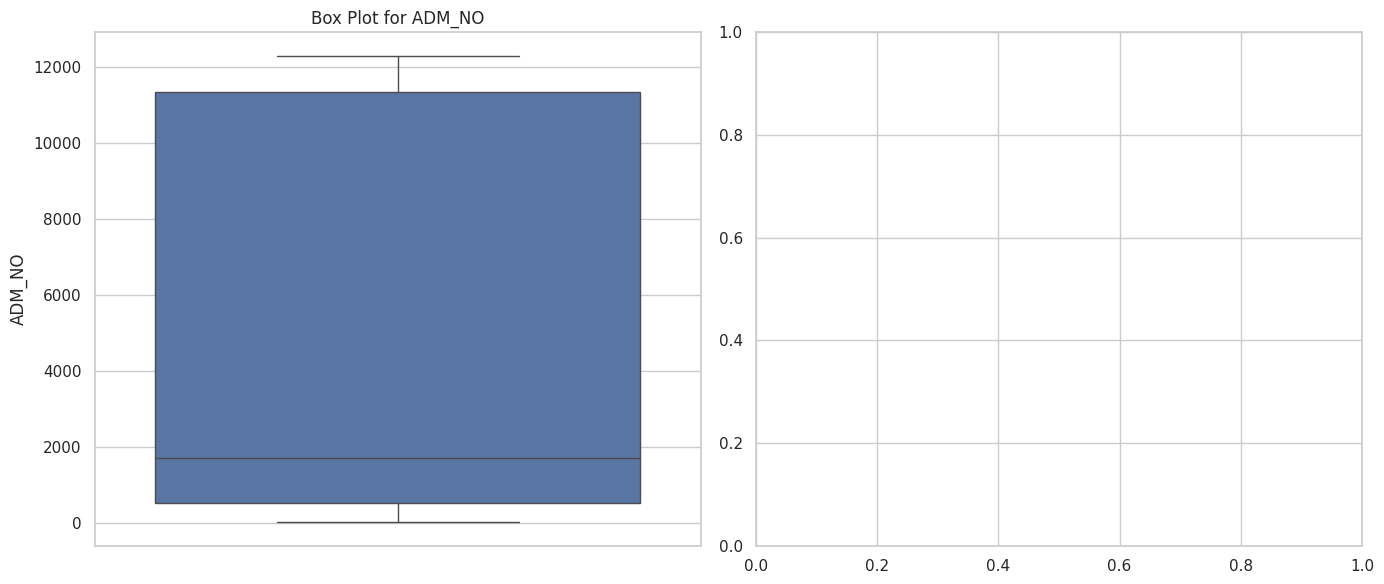

In [89]:
# Setting up the plot style
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for ADM_NO
sns.boxplot(y=schoolerp["ADM_NO"], ax=ax[0])
ax[0].set_title("Box Plot for ADM_NO")
ax[0].set_ylabel("ADM_NO")

# Show the plots
plt.tight_layout()
plt.show()

## Bivariate

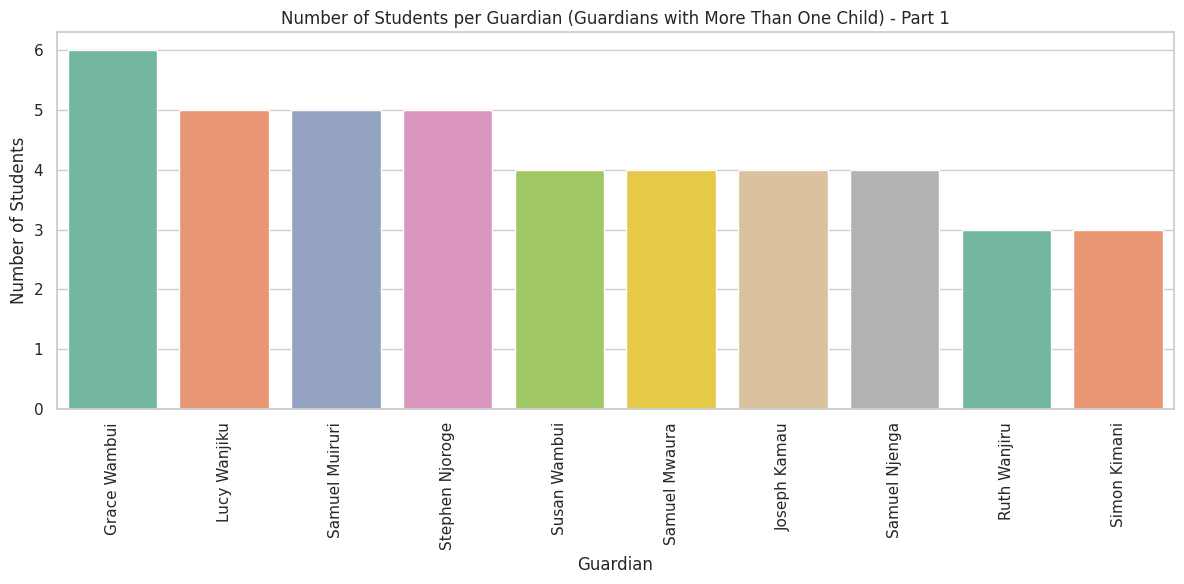

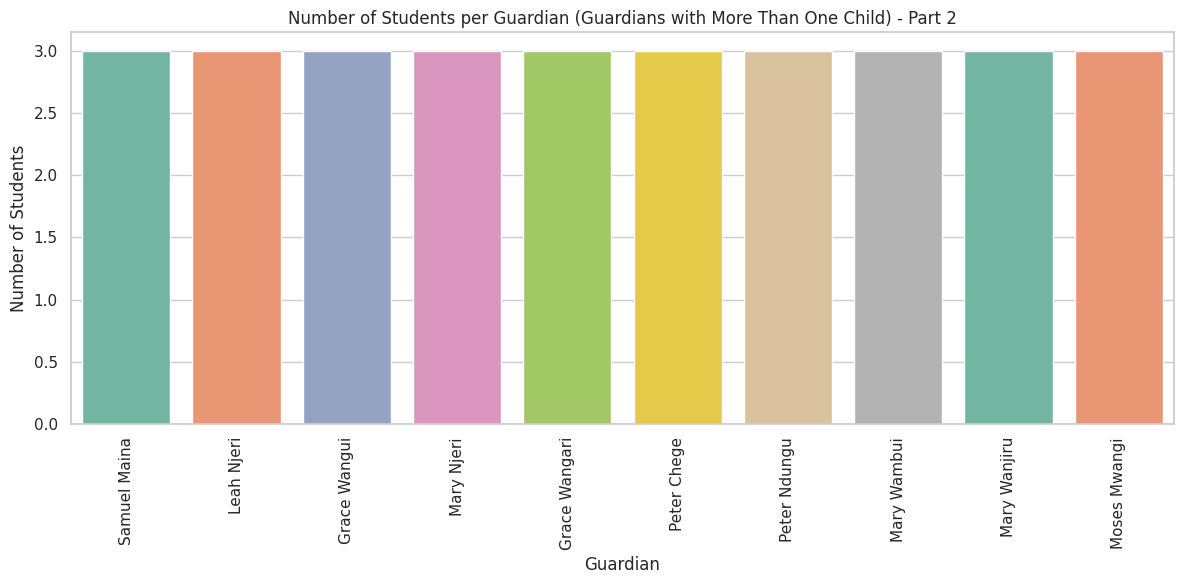

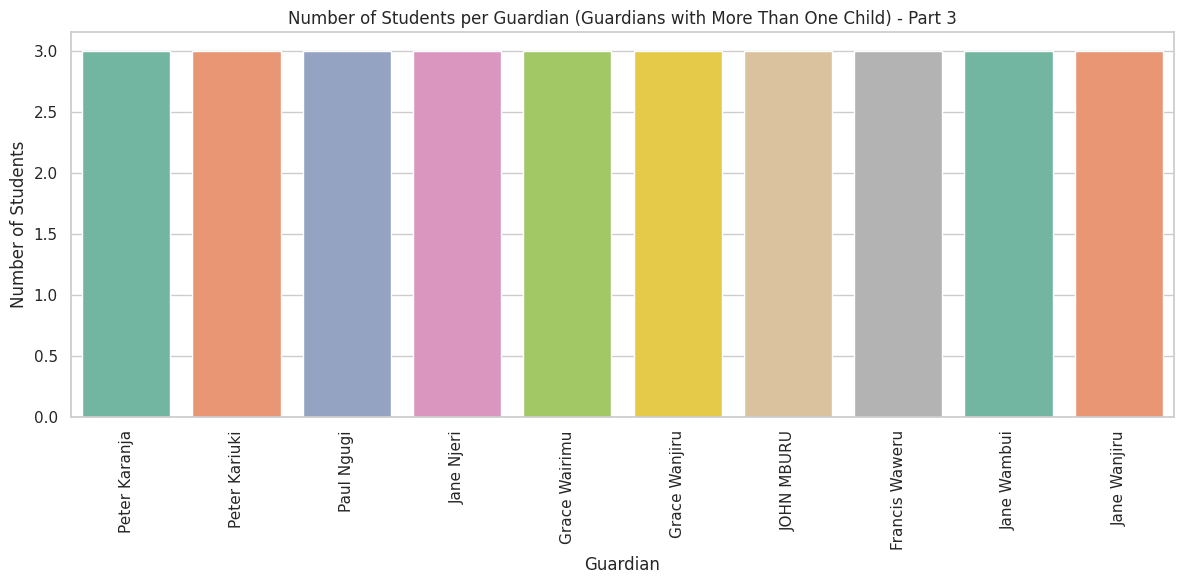

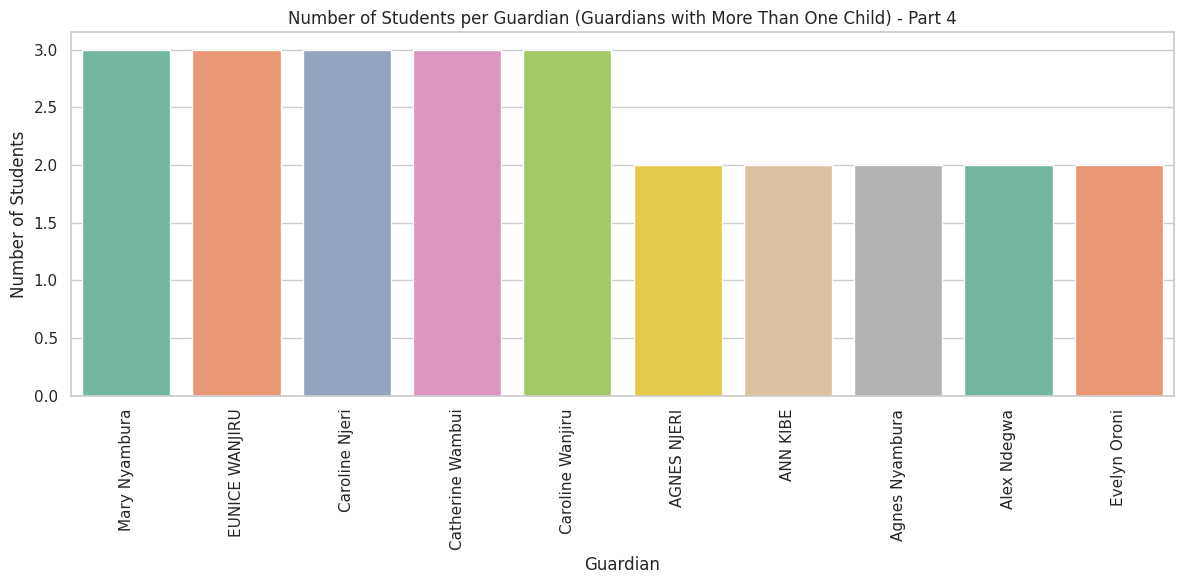

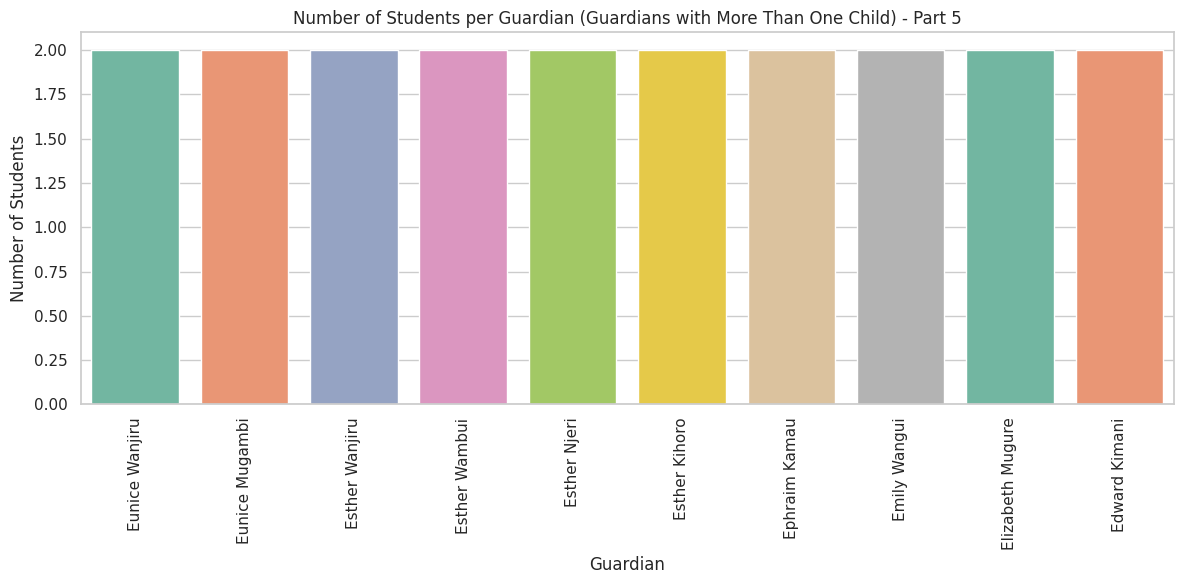

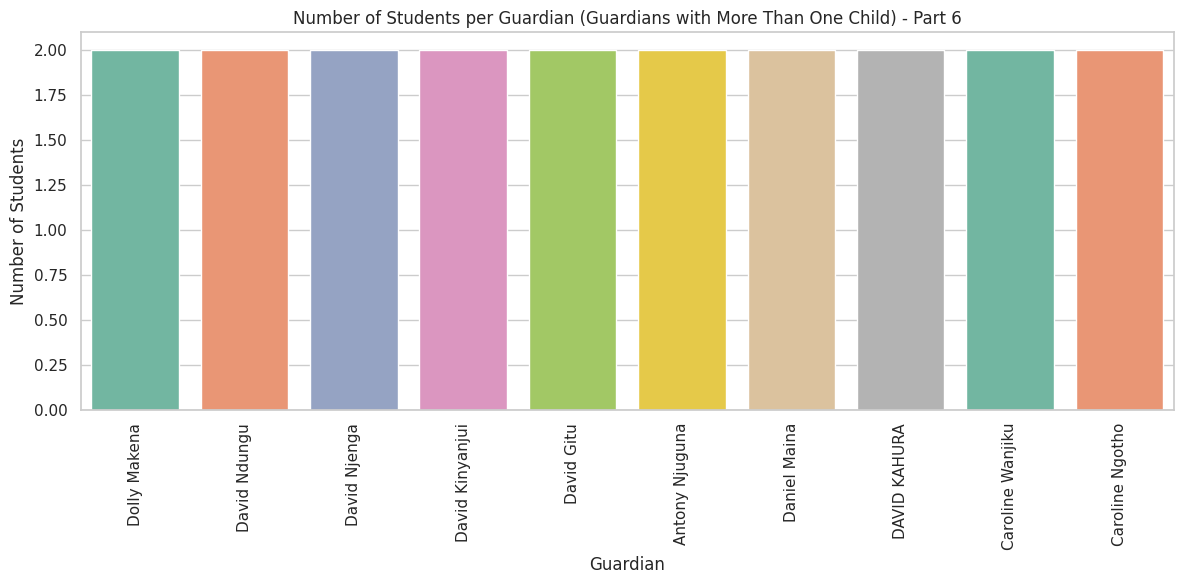

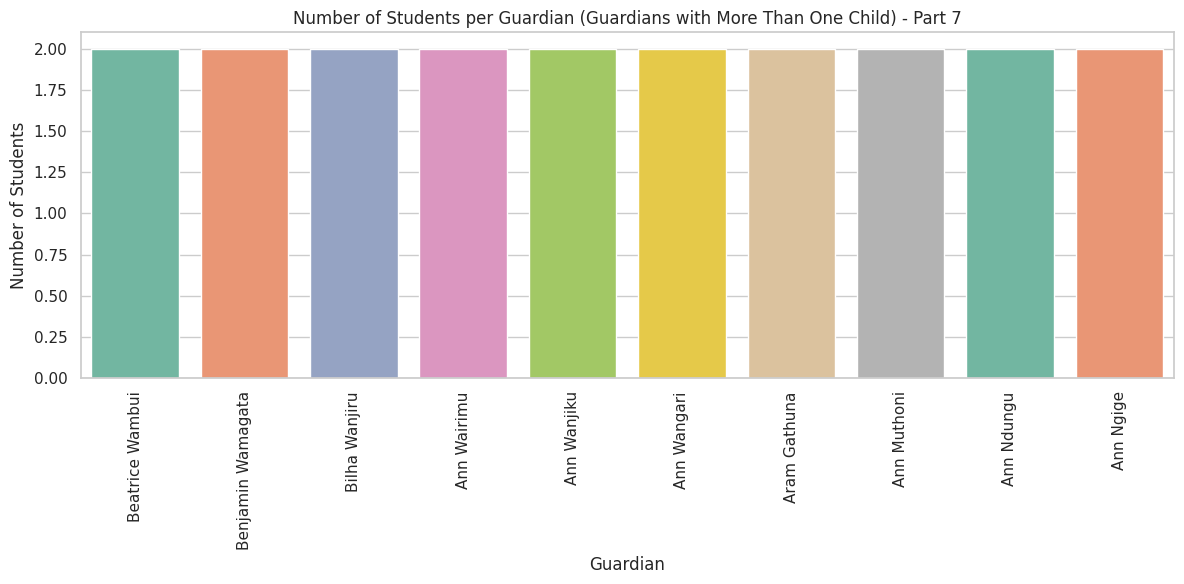

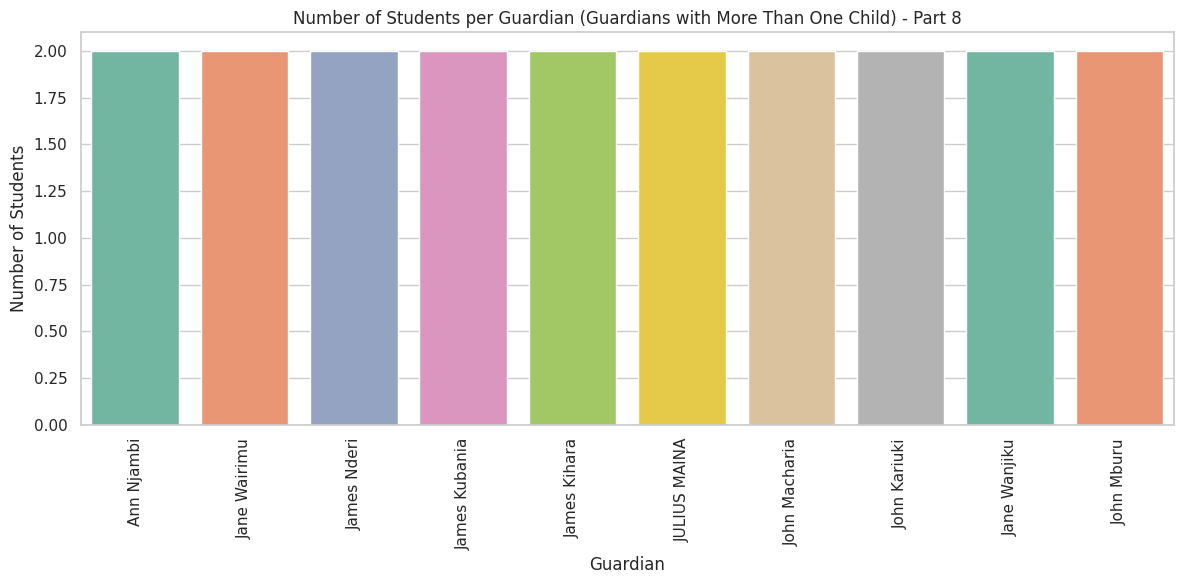

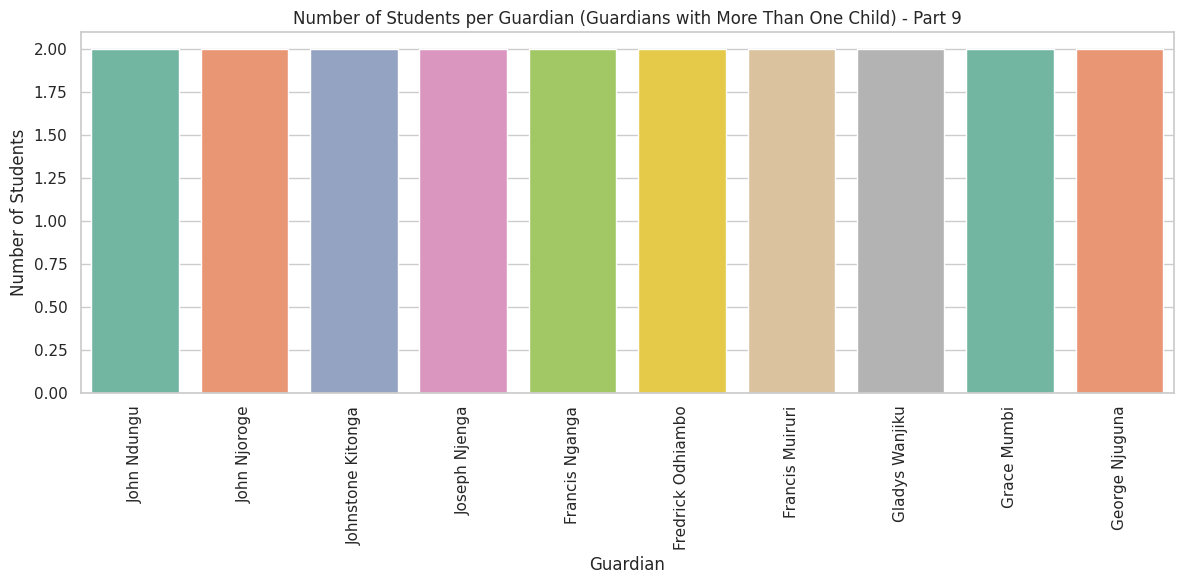

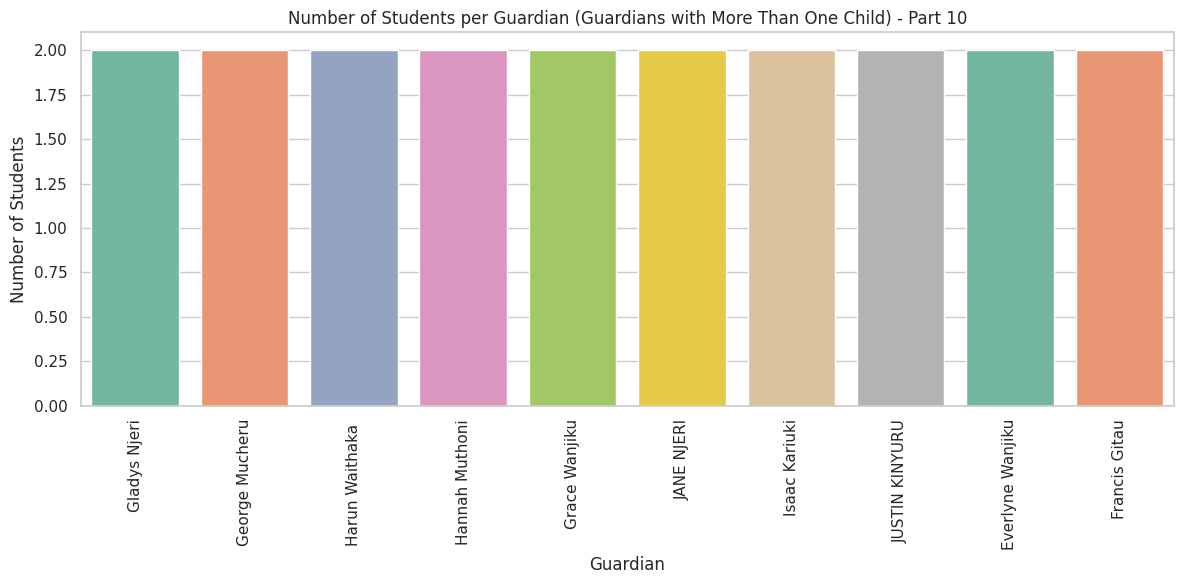

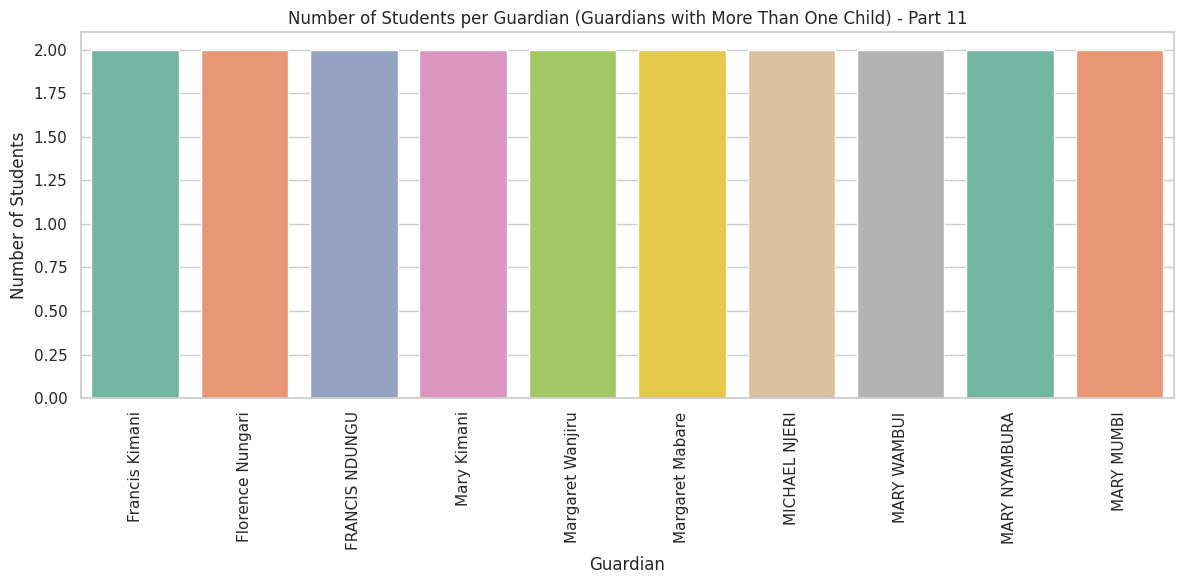

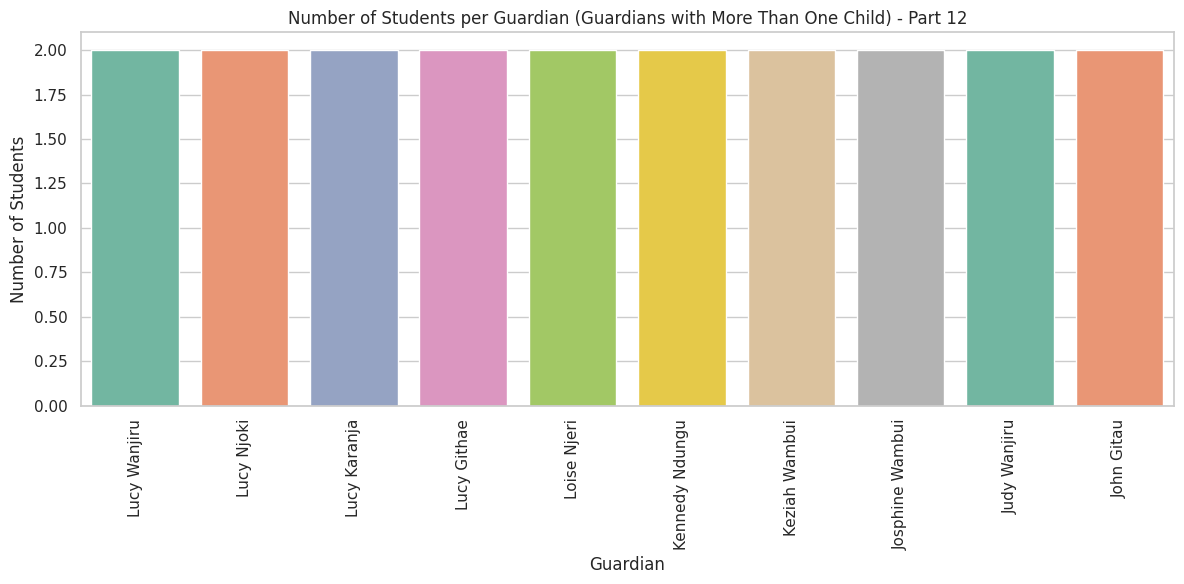

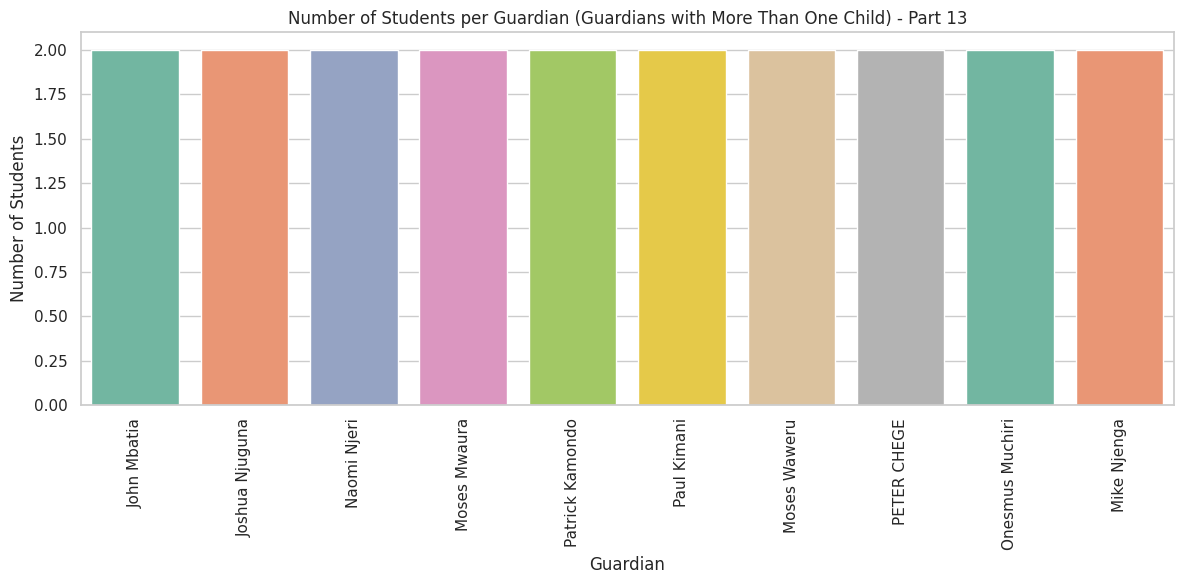

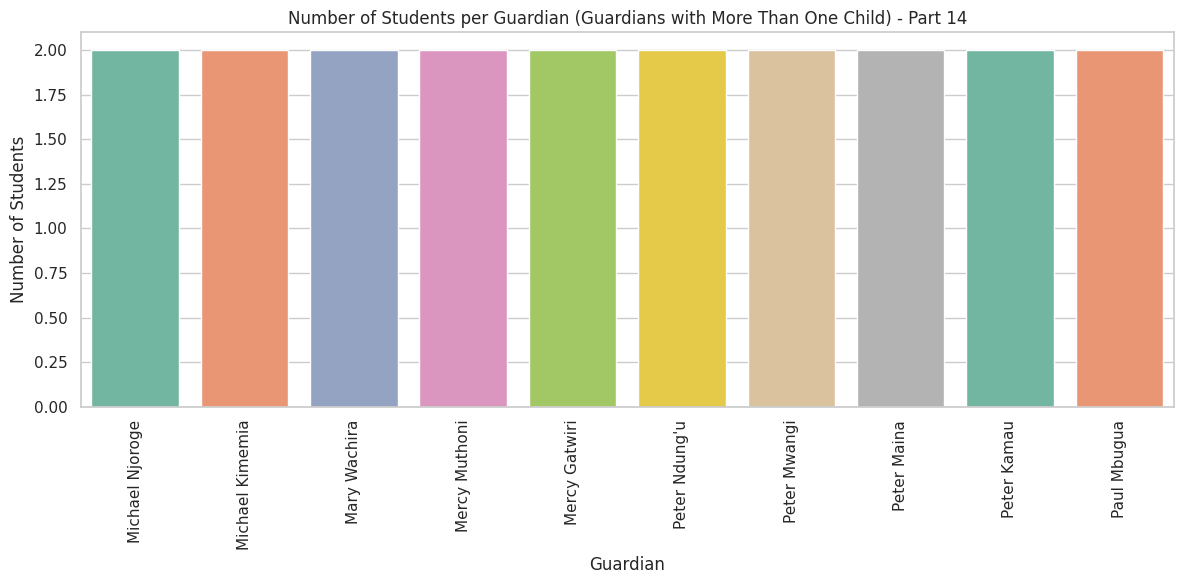

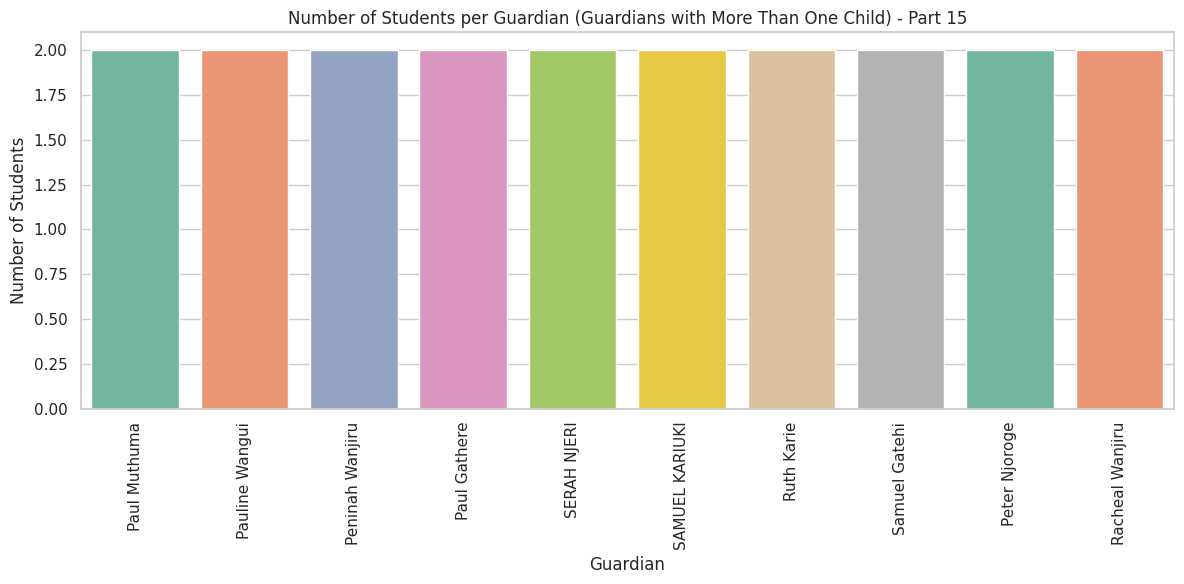

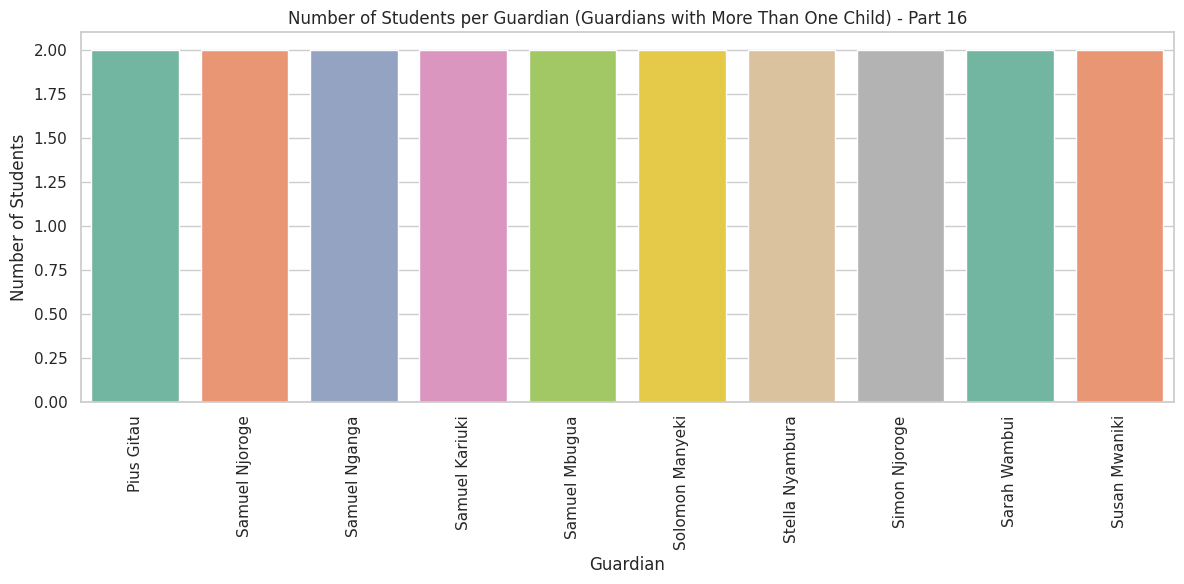

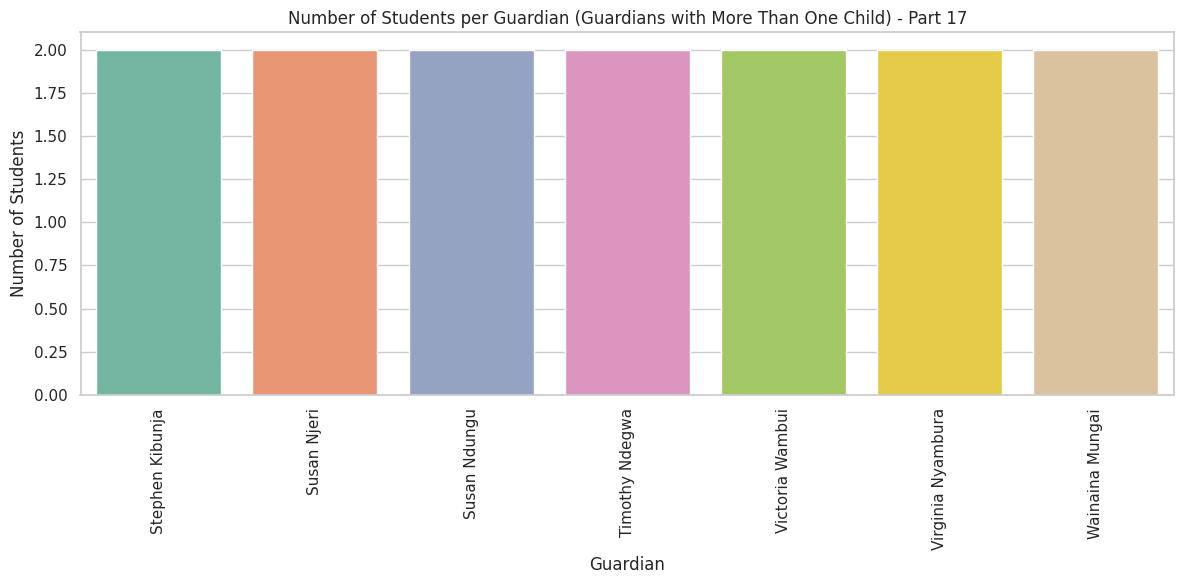

In [91]:
# Assuming you have already loaded your data into the `schoolerp` DataFrame
# Group by PARENT_NAME and count the number of students per guardian
guardian_student_counts = schoolerp.groupby(['PARENT_NAME'])['STUDENT_NAME'].count().reset_index()

# Rename columns for clarity
guardian_student_counts.columns = ['PARENT_NAME', 'STUDENT_COUNT']

# Filter to only include guardians with more than one student
multiple_students_guardians = guardian_student_counts[guardian_student_counts['STUDENT_COUNT'] > 1]

# Sort the data by student count (optional, for clarity)
multiple_students_guardians = multiple_students_guardians.sort_values(by='STUDENT_COUNT', ascending=False)

# Skip the first parent for the first figure
first_parent_skipped = multiple_students_guardians.iloc[1:]

# Number of guardians to display per figure
chunk_size = 10

# Split the data into chunks of 10 guardians each (after skipping the first parent)
chunks = [first_parent_skipped[i:i + chunk_size] for i in range(0, len(first_parent_skipped), chunk_size)]

# Loop through each chunk and create a separate figure
for i, chunk in enumerate(chunks):
    # Set up the figure size for each plot
    plt.figure(figsize=(12, 6))

    # Create a barplot for each chunk
    sns.barplot(x='PARENT_NAME', y='STUDENT_COUNT', data=chunk, palette="Set2")

    # Set the plot title and labels for each figure
    plt.title(f'Number of Students per Guardian (Guardians with More Than One Child) - Part {i+1}')
    plt.xlabel('Guardian')
    plt.ylabel('Number of Students')

    # Rotate the x-axis labels for readability
    plt.xticks(rotation=90)

    # Adjust layout for each figure
    plt.tight_layout()

    # Show the plot for this chunk
    plt.show()

Distribution of Classes:
Visualization: Bar chart or count plot showing the number of students in each class.
Purpose: Understand how students are distributed across different classes.

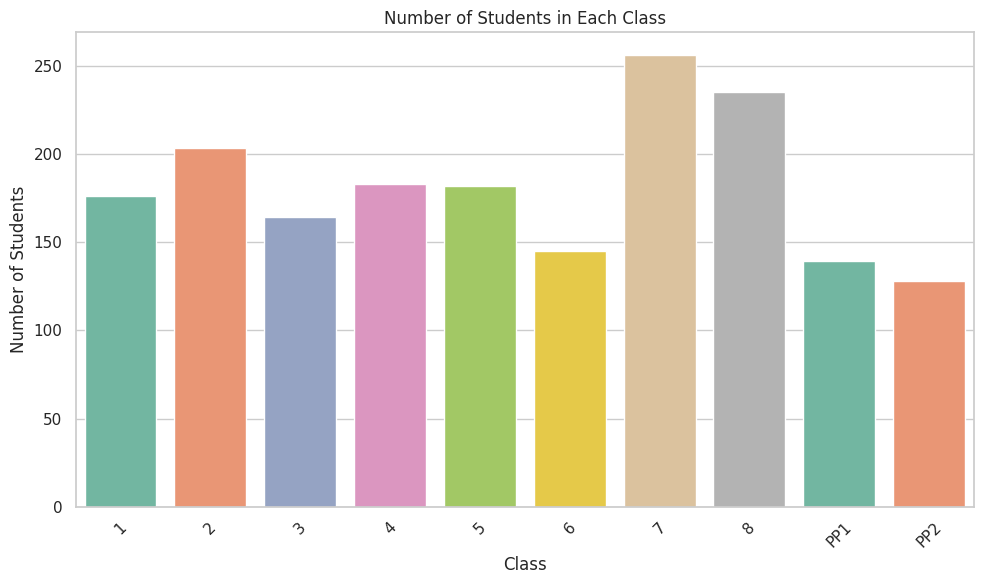

In [93]:
# Group by CLASS and count the number of students in each class
class_student_counts = schoolerp.groupby('CLASS')['STUDENT_NAME'].count().reset_index()

# Rename columns for clarity
class_student_counts.columns = ['CLASS', 'STUDENT_COUNT']

# Set up plot styling
sns.set(style="whitegrid")

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a barplot
sns.barplot(x='CLASS', y='STUDENT_COUNT', data=class_student_counts, palette="Set2")

# Set the plot title and labels
plt.title('Number of Students in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Students')

# Rotate the x-axis labels for readability (if needed)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

## The number of students for each class teacher

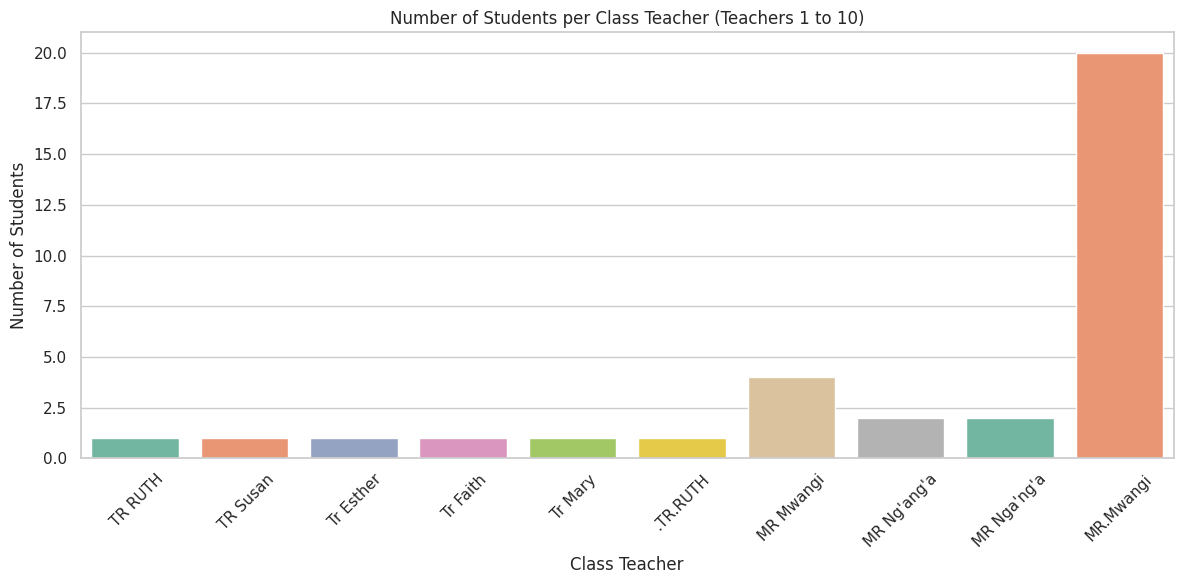

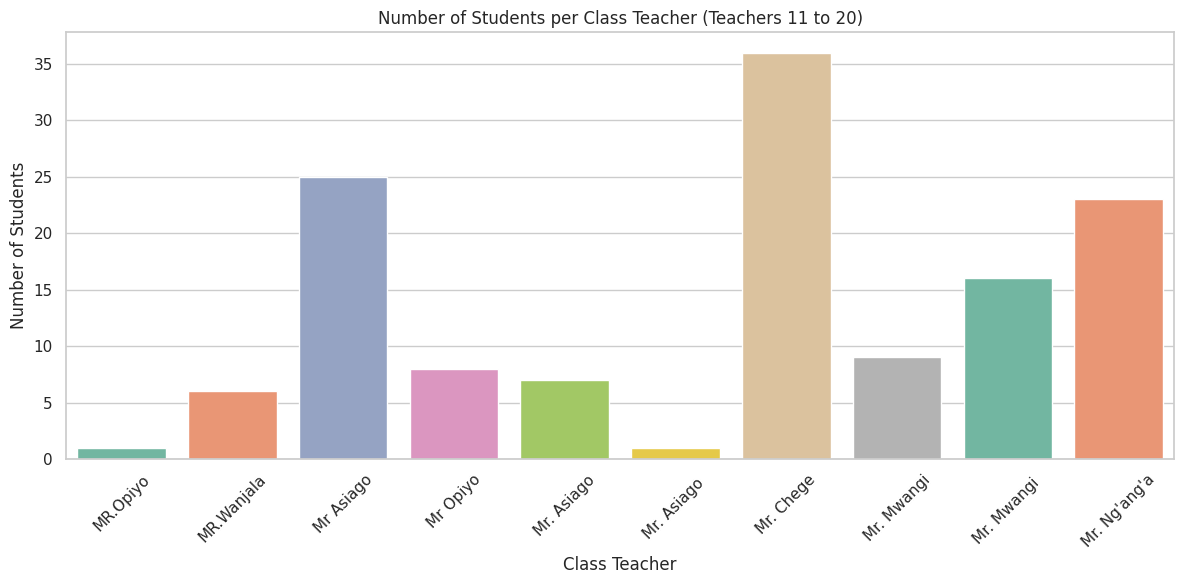

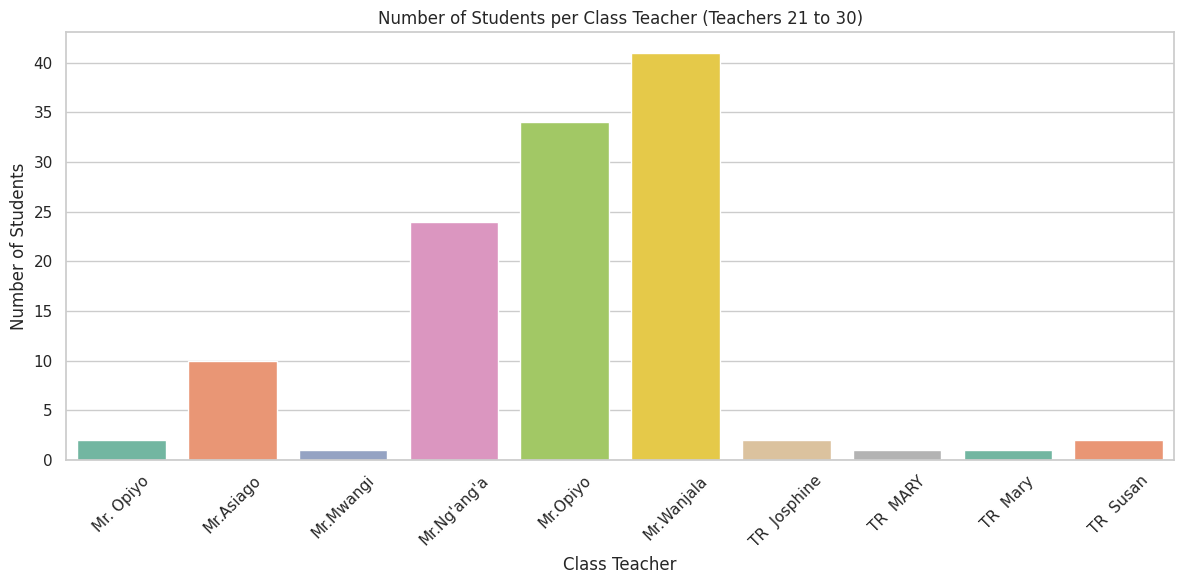

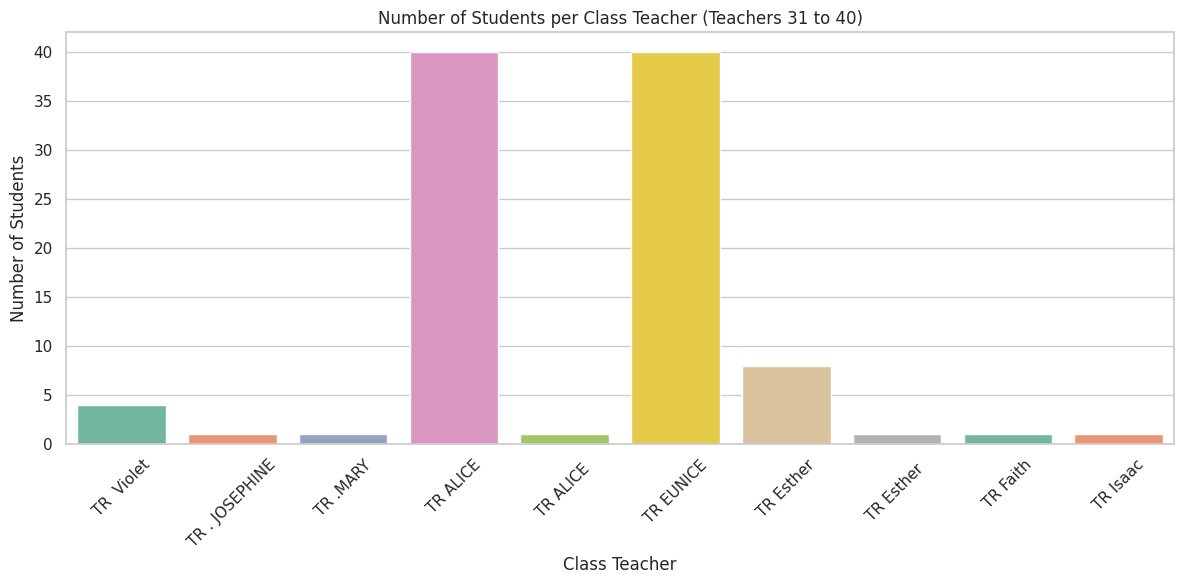

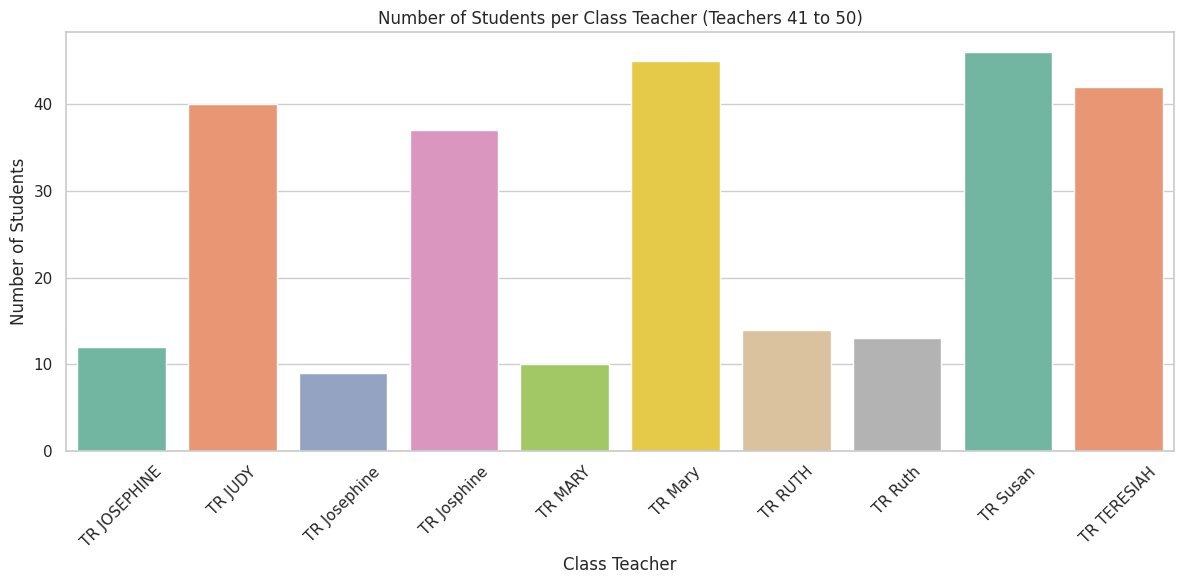

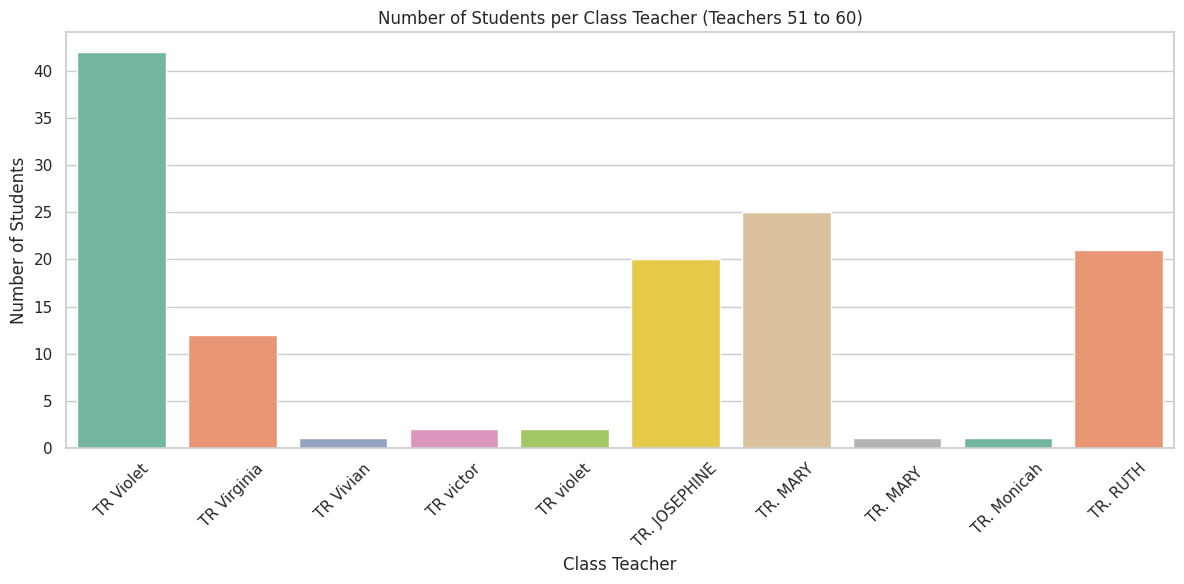

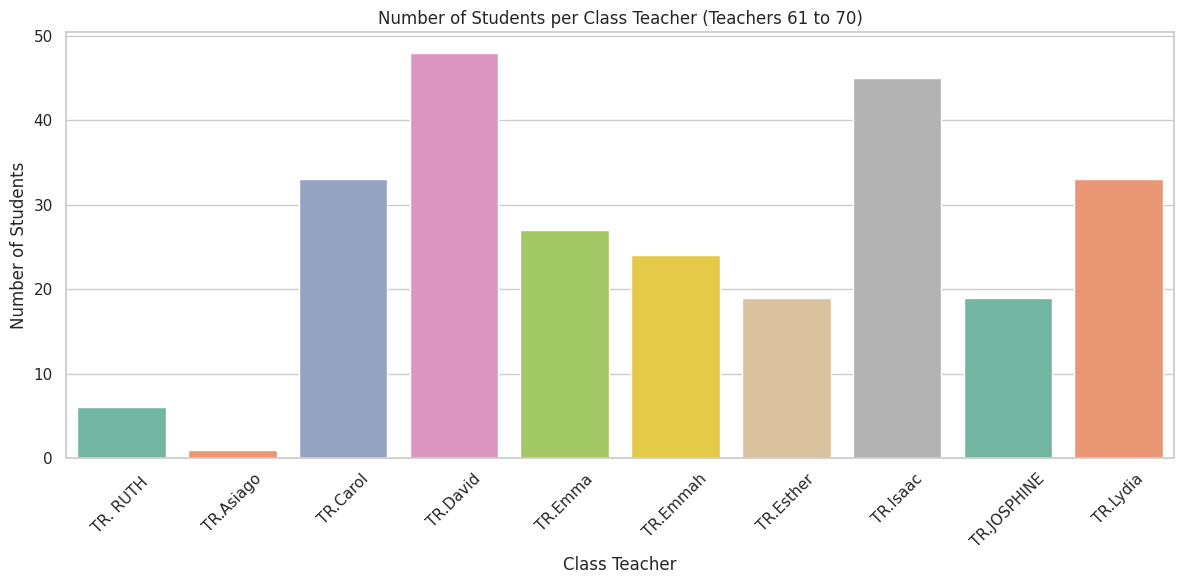

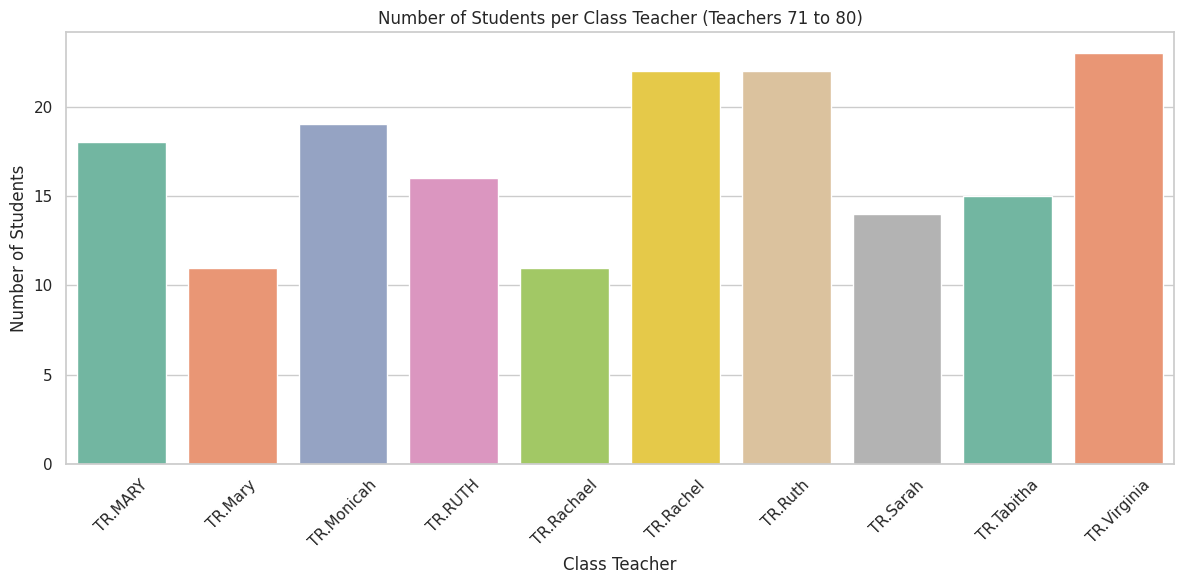

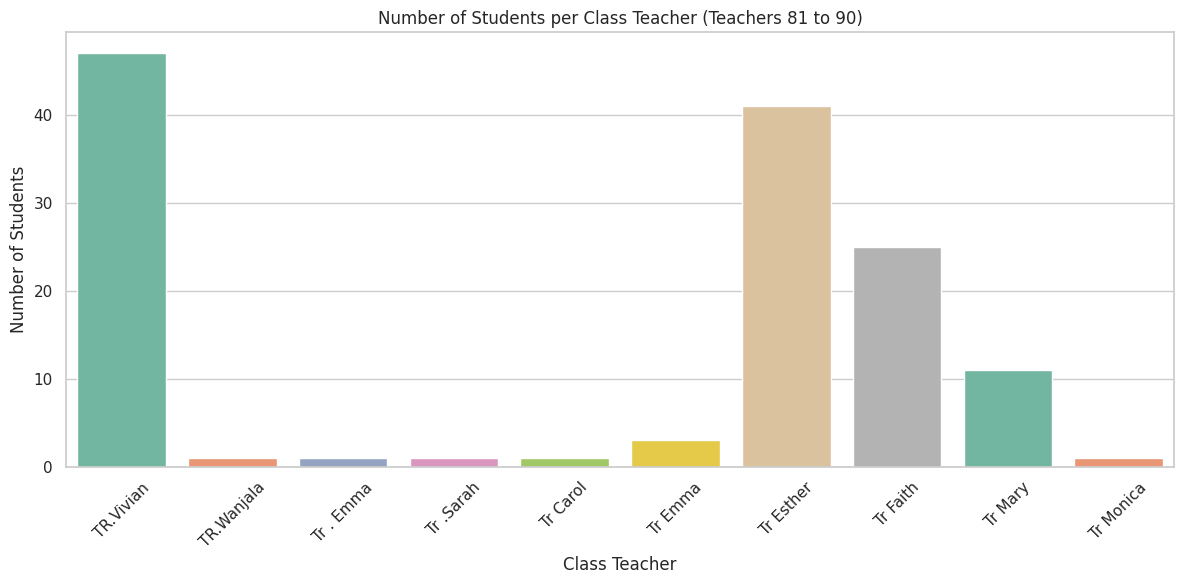

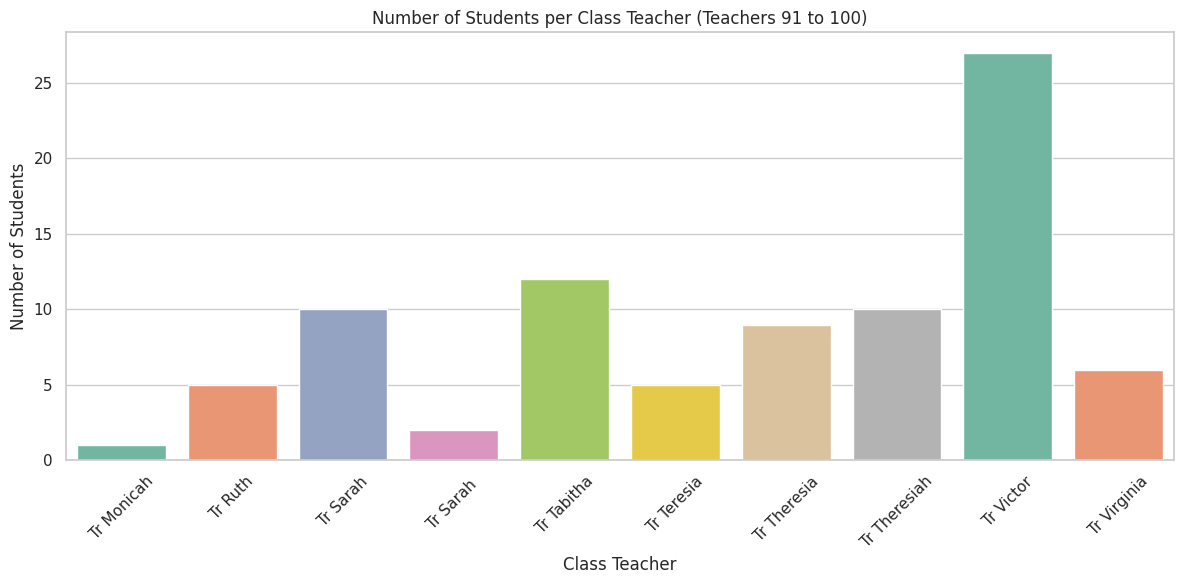

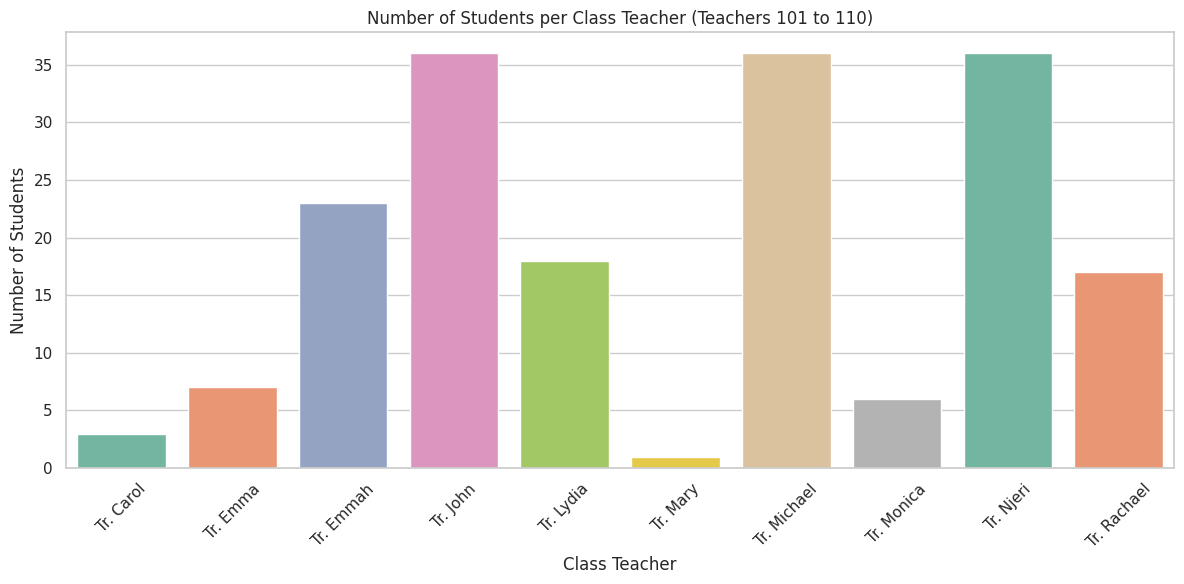

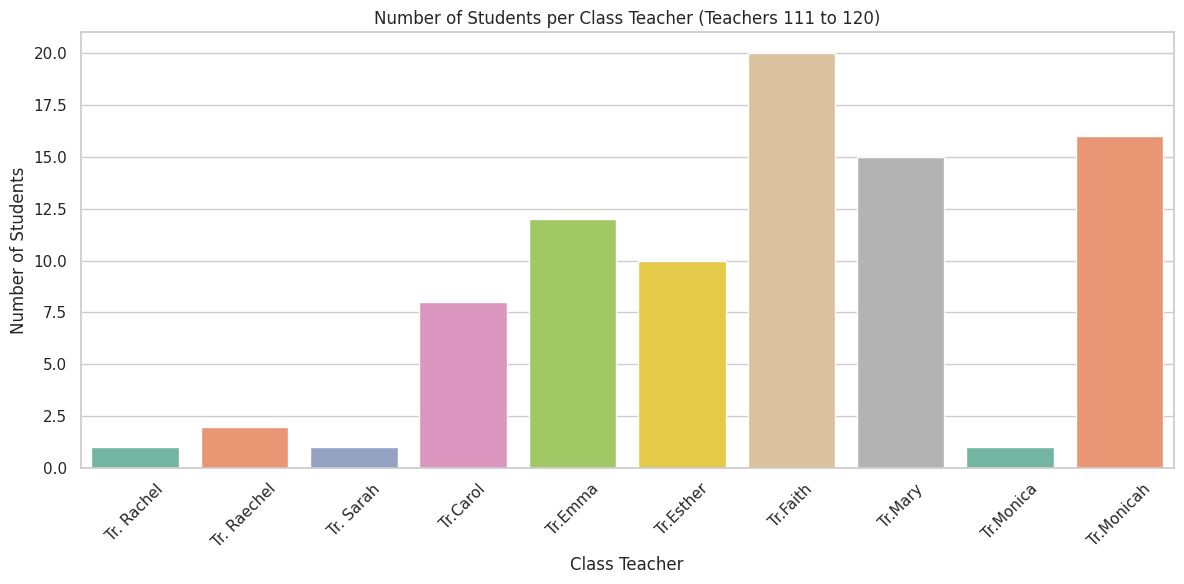

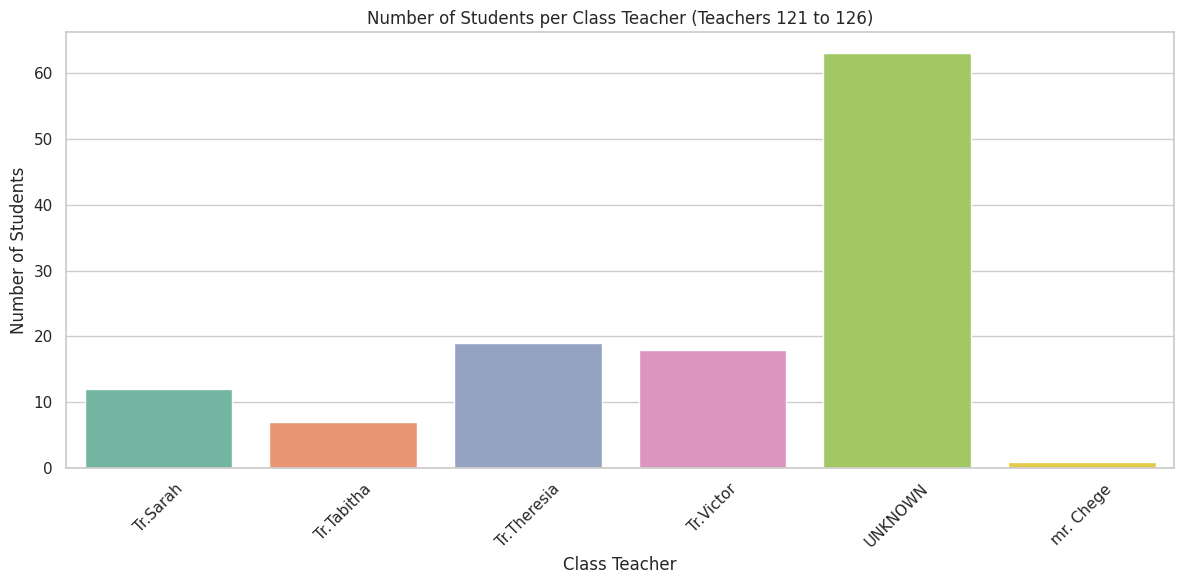

In [95]:
# Group by CLASSTEACHER and count the number of students for each class teacher
teacher_student_counts = schoolerp.groupby('CLASSTEACHER')['STUDENT_NAME'].count().reset_index()

# Rename columns for clarity
teacher_student_counts.columns = ['CLASSTEACHER', 'STUDENT_COUNT']

# Set up plot styling
sns.set(style="whitegrid")

# Number of plots to create based on the number of teachers (10 per figure)
num_teachers = teacher_student_counts.shape[0]
num_plots = (num_teachers // 10) + (1 if num_teachers % 10 else 0)

# Loop to create each figure
for i in range(num_plots):
    # Select teachers for the current plot
    start = i * 10
    end = start + 10
    chunk = teacher_student_counts.iloc[start:end]
    
    # Set up the figure size
    plt.figure(figsize=(12, 6))
    
    # Create a barplot
    sns.barplot(x='CLASSTEACHER', y='STUDENT_COUNT', data=chunk, palette="Set2")
    
    # Set the plot title and labels
    plt.title(f'Number of Students per Class Teacher (Teachers {start + 1} to {min(end, num_teachers)})')
    plt.xlabel('Class Teacher')
    plt.ylabel('Number of Students')
    
    # Rotate the x-axis labels for readability
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

## Multivariate

D/B Analysis:
Visualization: Bar chart showing the number of students with each D/B status (D or B).
Purpose: Understand the proportion of students categorized under each D/B.

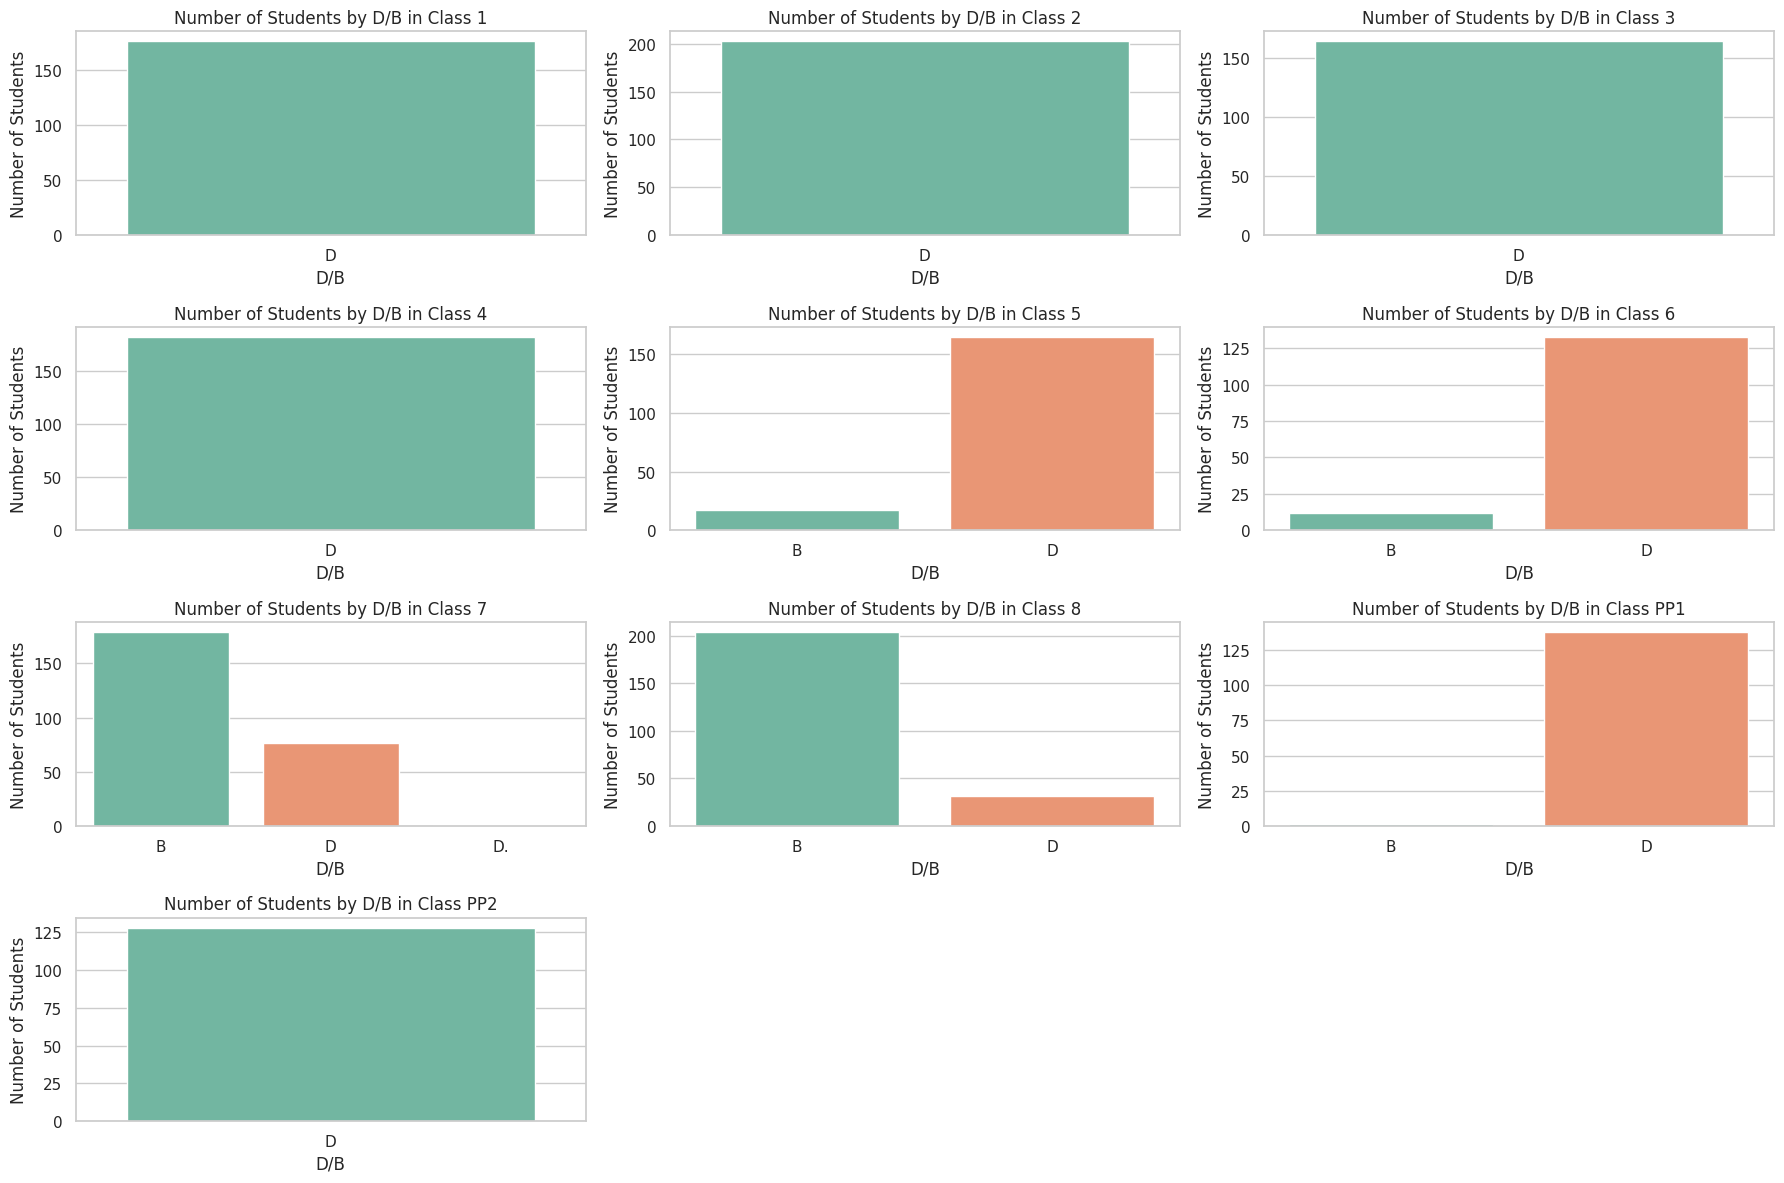

In [98]:
# Set up plot styling
sns.set(style="whitegrid")

# Group by CLASS and D/B and count the number of students
db_student_counts = schoolerp.groupby(['CLASS', 'D/B'])['STUDENT_NAME'].count().reset_index()

# Rename columns for clarity
db_student_counts.columns = ['CLASS', 'D/B', 'STUDENT_COUNT']

# Set up the figure size for multiple figures
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))  # Adjust nrows and ncols for your needs
axes = axes.flatten()  # Flatten to easily access axes

# Get unique classes to iterate through
unique_classes = db_student_counts['CLASS'].unique()

# Plot each class in a separate subplot
for i, cls in enumerate(unique_classes):
    ax = axes[i]
    class_data = db_student_counts[db_student_counts['CLASS'] == cls]
    
    sns.barplot(x='D/B', y='STUDENT_COUNT', data=class_data, ax=ax, palette="Set2")
    
    # Set title and labels
    ax.set_title(f'Number of Students by D/B in Class {cls}')
    ax.set_xlabel('D/B')
    ax.set_ylabel('Number of Students')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.tight_layout()
plt.show()

## Number of students per class per stream

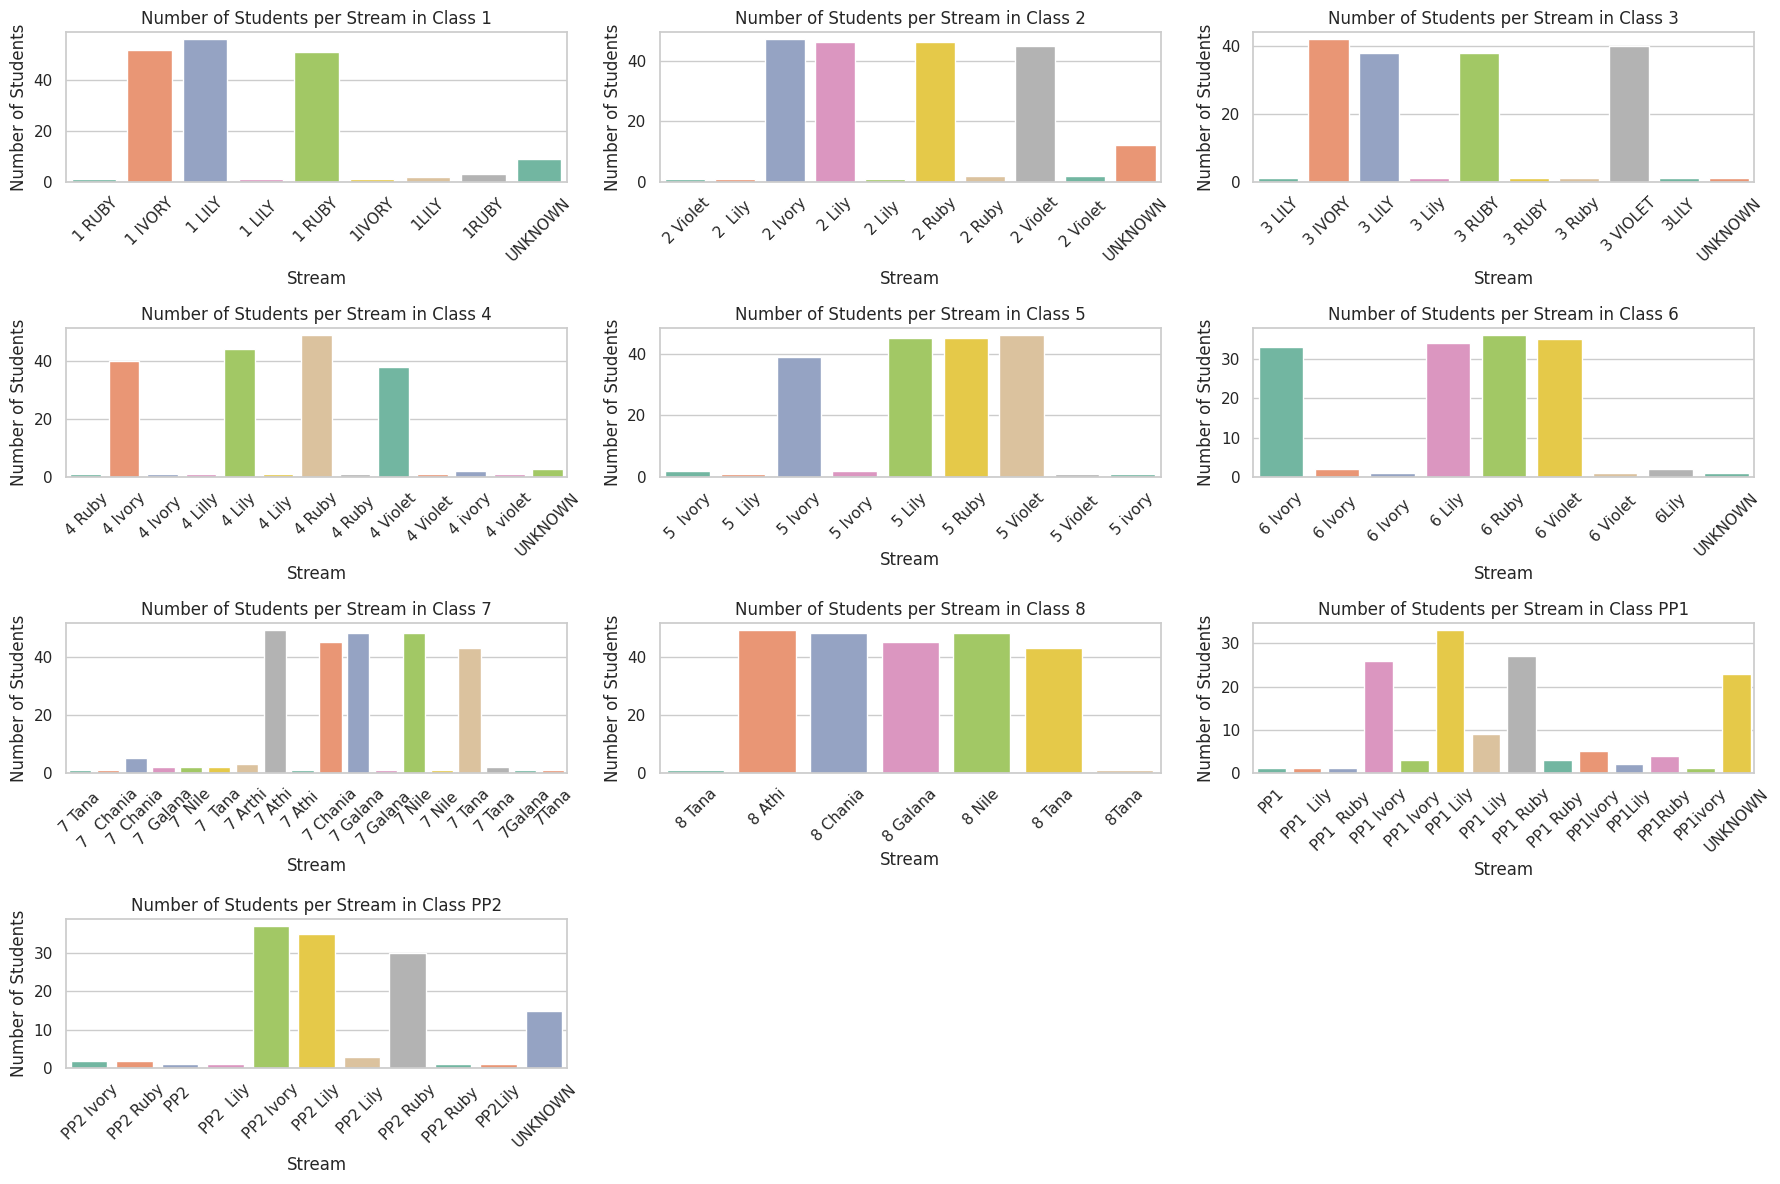

In [100]:
# Set up plot styling
sns.set(style="whitegrid")

# Group by CLASS and STREAM and count the number of students
stream_student_counts = schoolerp.groupby(['CLASS', 'STREAM'])['STUDENT_NAME'].count().reset_index()

# Rename columns for clarity
stream_student_counts.columns = ['CLASS', 'STREAM', 'STUDENT_COUNT']

# Set up the figure size for multiple figures
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))  # Adjust nrows and ncols for your needs
axes = axes.flatten()  # Flatten to easily access axes

# Get unique classes to iterate through
unique_classes = stream_student_counts['CLASS'].unique()

# Plot each class in a separate subplot
for i, cls in enumerate(unique_classes):
    ax = axes[i]
    class_data = stream_student_counts[stream_student_counts['CLASS'] == cls]
    
    sns.barplot(x='STREAM', y='STUDENT_COUNT', data=class_data, ax=ax, palette="Set2")
    
    # Set title and labels
    ax.set_title(f'Number of Students per Stream in Class {cls}')
    ax.set_xlabel('Stream')
    ax.set_ylabel('Number of Students')
    
    # Rotate x-axis labels
    ax.set_xticklabels(class_data['STREAM'], rotation=45)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.tight_layout()
plt.show()

# Feature Engineering

## Splitting parents name into parent first name and parent last name

In [103]:
# Split the PARENT_NAME column into new columns
parent_names_split = schoolerp['PARENT_NAME'].str.split(expand=True)

# Create new columns, using the first and last name, if they exist
schoolerp['PARENT_FIRST_NAME'] = parent_names_split[0]  # First name
schoolerp['PARENT_LAST_NAME'] = parent_names_split[1] if parent_names_split.shape[1] > 1 else None  # Last name

# Drop the original PARENT_NAME column
schoolerp.drop(columns=['PARENT_NAME'], inplace=True)

# Check the updated DataFrame columns and a sample of the data
schoolerp

,CLASS,ADM_NO,STUDENT_NAME,D/B,TELEPHONE,STREAM,CLASSTEACHER,STATUS,PARENT_FIRST_NAME,PARENT_LAST_NAME
0,PP1,1678,DYLAN MWAURA MUNGAI,D,0722961925,PP1 Ruby,TR Esther,Present,Samuel,Mwaura
1,PP1,1687,ALBERT NJENGA KINENE,D,0000000000,PP1 Lily,TR Virginia,Present,Joshua,Kinene
2,PP1,1745,ETHAN WANJAU WANJIKU,D,0000000000,UNKNOWN,UNKNOWN,PRESENT,UNKNOWN,None
3,PP1,1756,JOSEPH NDUNGU KARARI,D,0000000000,UNKNOWN,TR Ruth,Present,Jonh,Karari
4,PP1,1836,NELLY WAMBUI,D,0000000000,PP1 Ivory,TR Ruth,Present,Wilson,Kamaneu
...,...,...,...,...,...,...,...,...,...,...
1863,8,541,LEWIS NGARU WACHIRA,B,0726261305,8 Chania,TR.Vivian,Present,George,Gichimo
1864,8,542,JAIME MUTHIORA MWANGI,B,0721426072,8 Galana,Mr Opiyo,Present,David,Mwangi
1865,8,544,JOEL CHAHILU CHALA,B,0723100910,8 Chania,TR.Vivian,Present,Jackeline,Luvanda
1866,8,245,STELLA NYAMBURA MUNGAI,B,0725753266,8 Galana,Mr Opiyo,Present,Geoffrey,Mungai


## Dropping class teacher

In [105]:
schoolerp.drop(columns=['CLASSTEACHER'], inplace=True)
schoolerp

,CLASS,ADM_NO,STUDENT_NAME,D/B,TELEPHONE,STREAM,STATUS,PARENT_FIRST_NAME,PARENT_LAST_NAME
0,PP1,1678,DYLAN MWAURA MUNGAI,D,0722961925,PP1 Ruby,Present,Samuel,Mwaura
1,PP1,1687,ALBERT NJENGA KINENE,D,0000000000,PP1 Lily,Present,Joshua,Kinene
2,PP1,1745,ETHAN WANJAU WANJIKU,D,0000000000,UNKNOWN,PRESENT,UNKNOWN,None
3,PP1,1756,JOSEPH NDUNGU KARARI,D,0000000000,UNKNOWN,Present,Jonh,Karari
4,PP1,1836,NELLY WAMBUI,D,0000000000,PP1 Ivory,Present,Wilson,Kamaneu
...,...,...,...,...,...,...,...,...,...
1863,8,541,LEWIS NGARU WACHIRA,B,0726261305,8 Chania,Present,George,Gichimo
1864,8,542,JAIME MUTHIORA MWANGI,B,0721426072,8 Galana,Present,David,Mwangi
1865,8,544,JOEL CHAHILU CHALA,B,0723100910,8 Chania,Present,Jackeline,Luvanda
1866,8,245,STELLA NYAMBURA MUNGAI,B,0725753266,8 Galana,Present,Geoffrey,Mungai


## Rename the CLASS column to GRADE

In [107]:
schoolerp.rename(columns={'CLASS': 'GRADE'}, inplace=True)
schoolerp

,GRADE,ADM_NO,STUDENT_NAME,D/B,TELEPHONE,STREAM,STATUS,PARENT_FIRST_NAME,PARENT_LAST_NAME
0,PP1,1678,DYLAN MWAURA MUNGAI,D,0722961925,PP1 Ruby,Present,Samuel,Mwaura
1,PP1,1687,ALBERT NJENGA KINENE,D,0000000000,PP1 Lily,Present,Joshua,Kinene
2,PP1,1745,ETHAN WANJAU WANJIKU,D,0000000000,UNKNOWN,PRESENT,UNKNOWN,None
3,PP1,1756,JOSEPH NDUNGU KARARI,D,0000000000,UNKNOWN,Present,Jonh,Karari
4,PP1,1836,NELLY WAMBUI,D,0000000000,PP1 Ivory,Present,Wilson,Kamaneu
...,...,...,...,...,...,...,...,...,...
1863,8,541,LEWIS NGARU WACHIRA,B,0726261305,8 Chania,Present,George,Gichimo
1864,8,542,JAIME MUTHIORA MWANGI,B,0721426072,8 Galana,Present,David,Mwangi
1865,8,544,JOEL CHAHILU CHALA,B,0723100910,8 Chania,Present,Jackeline,Luvanda
1866,8,245,STELLA NYAMBURA MUNGAI,B,0725753266,8 Galana,Present,Geoffrey,Mungai


## Function to clean the STREAM column by removing the grade prefix

In [109]:
schoolerp["STREAM"].unique()

array(['PP1 Ruby', 'PP1 Lily', 'UNKNOWN', 'PP1 Ivory', 'PP1 Lily ',
       'PP1 Ruby ', 'PP1 Ivory ', 'PP1  Ruby ', 'PP1  Lily', 'PP1Lily',
       'PP1ivory', 'PP1Ivory', 'PP1Ruby', 'PP1', 'PP2 Lily', 'PP2 Ruby',
       'PP2 Ivory', 'PP2  Lily', 'PP2 Ruby ', ' PP2 Ruby', ' PP2 Ivory',
       'PP2 ', 'PP2 Lily ', 'PP2Lily', '1 IVORY', '1 LILY', '1 RUBY',
       '1RUBY', '1IVORY', '1LILY', ' 1 RUBY', '1 LILY ', '2 Violet',
       '2 Ivory', '2 Lily', '2 Ruby', '2  Lily ', '2 Violet ', '2 Lily ',
       ' 2 Violet', '2 Ruby ', '3 IVORY', '3 VIOLET', '3 LILY', '3 RUBY',
       ' 3 LILY', '3 Lily', '3LILY', '3 Ruby', '3 RUBY ', '4 Violet',
       '4 Lily', '4 Ruby', '4 Ivory', '4 Ivory ', '4 Violet ', '4 Ruby ',
       '4 Lily ', '4 Lilly', ' 4 Ruby', '4 ivory', '4 violet', '5 Violet',
       '5 Lily', '5 Ruby', '5 Ivory', '5 Ivory ', '5 Violet ', '5  Ivory',
       '5  Lily', '5 ivory', '6 Violet', '6 Ivory', '6Lily', '6 Ruby',
       '6 Lily', '6 Violet ', '6 Ivory ', '6 Ivory  ', '7 Tana

In [110]:
def clean_stream_column(df):
    # Clean STREAM column: Remove first digit, convert to lowercase, and strip whitespace
    df["STREAM"] = df["STREAM"].str.replace(r'^\d+', '', regex=True)  # Remove leading digits
    df["STREAM"] = df["STREAM"].str.replace(r'pp1', '', regex=True).str.replace(r'pp2', '', regex=True)  # Remove PP1 and PP2
    df["STREAM"] = df["STREAM"].str.strip().str.lower()  # Strip whitespace and convert to lowercase
    
    # Replace empty strings with 'unknown'
    df["STREAM"].replace("", "unknown", inplace=True)

    # Handle specific cases for 'D' and 'B'
    df["STREAM"] = df["STREAM"].str.replace("unknown", "unknown").replace("", "unknown")  # Ensure unknowns are handled

    return df

# Example usage
# Assuming you have your DataFrame named 'schoolerp'
schoolerp_cleaned = clean_stream_column(schoolerp)

# Check the cleaned STREAM column
print(schoolerp_cleaned["STREAM"].unique())

['pp1 ruby' 'pp1 lily' 'unknown' 'pp1 ivory' 'pp1  ruby' 'pp1  lily'
 'pp1lily' 'pp1ivory' 'pp1ruby' 'pp1' 'pp2 lily' 'pp2 ruby' 'pp2 ivory'
 'pp2  lily' 'pp2' 'pp2lily' 'ivory' 'lily' 'ruby' '1 ruby' 'violet'
 '2 violet' '3 lily' 'lilly' '4 ruby' 'tana' 'nile' 'athi' 'chania'
 'galana' 'arthi' '7 tana' '8 tana']


In [111]:
def clean_stream_column(df):
    # Clean STREAM column: Remove first digit, convert to lowercase, and strip whitespace
    df["STREAM"] = df["STREAM"].str.replace(r'^\d+', '', regex=True)  # Remove leading digits
    df["STREAM"] = df["STREAM"].str.replace(r'pp1', '', regex=True).str.replace(r'pp2', '', regex=True)  # Remove PP1 and PP2
    df["STREAM"] = df["STREAM"].str.strip().str.lower()  # Strip whitespace and convert to lowercase
    
    # Replace empty strings with 'unknown'
    df["STREAM"].replace("", "unknown", inplace=True)

    # Define a mapping of the cleaned values to unique keys
    unique_keys = {
        "ruby": "ruby",
        "lily": "lily",
        "unknown": "unknown",
        "ivory": "ivory",
        "violet": "violet",
        "tana": "tana",
        "nile": "nile",
        "athi": "athi",
        "chania": "chania",
        "galana": "galana"
    }
    
    # Replace cleaned STREAM values with unique keys if they exist in the mapping
    df["STREAM"] = df["STREAM"].apply(lambda x: unique_keys.get(x, "unknown"))  # Default to 'unknown'

    return df

# Example usage
# Assuming you have your DataFrame named 'schoolerp'
schoolerp_cleaned = clean_stream_column(schoolerp)

# Check the cleaned STREAM column
schoolerp_cleaned["STREAM"].unique()

array(['ruby', 'lily', 'unknown', 'ivory', 'violet', 'tana', 'nile',
       'athi', 'chania', 'galana'], dtype=object)

In [112]:
schoolerp["STREAM"].unique()

array(['ruby', 'lily', 'unknown', 'ivory', 'violet', 'tana', 'nile',
       'athi', 'chania', 'galana'], dtype=object)

## Label encoding day to 0 and boarding to 1

In [114]:
schoolerp["D/B"].unique()

array(['D', 'B', 'D.'], dtype=object)

In [115]:
# Replace 'D.' with 'D'
schoolerp["D/B"].replace('D.', 'D', inplace=True)

# Check the unique values again
print(schoolerp["D/B"].unique())

['D' 'B']


In [116]:
# Create a label encoder instance
label_encoder = LabelEncoder()

# Fit and transform the D/B column, where "D" is Day and "B" is Boarding
schoolerp["D/B"] = label_encoder.fit_transform(schoolerp["D/B"].replace({"D": "Day", "B": "Boarding"}))

# Create a mapping of encoded values to original categories
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}

# Display the mapping
print("Label Mapping:", label_mapping)

Label Mapping: {0: 'Boarding', 1: 'Day'}


In [117]:
schoolerp["D/B"].unique()

array([1, 0])

## Creating another column residence and filling it with the word "Kikuyu" for everyone

In [119]:
schoolerp["residence"] = "Kikuyu"

# Check the DataFrame to confirm the new column has been added
schoolerp

,GRADE,ADM_NO,STUDENT_NAME,D/B,TELEPHONE,STREAM,STATUS,PARENT_FIRST_NAME,PARENT_LAST_NAME,residence
0,PP1,1678,DYLAN MWAURA MUNGAI,1,0722961925,ruby,Present,Samuel,Mwaura,Kikuyu
1,PP1,1687,ALBERT NJENGA KINENE,1,0000000000,lily,Present,Joshua,Kinene,Kikuyu
2,PP1,1745,ETHAN WANJAU WANJIKU,1,0000000000,unknown,PRESENT,UNKNOWN,None,Kikuyu
3,PP1,1756,JOSEPH NDUNGU KARARI,1,0000000000,unknown,Present,Jonh,Karari,Kikuyu
4,PP1,1836,NELLY WAMBUI,1,0000000000,ivory,Present,Wilson,Kamaneu,Kikuyu
...,...,...,...,...,...,...,...,...,...,...
1863,8,541,LEWIS NGARU WACHIRA,0,0726261305,chania,Present,George,Gichimo,Kikuyu
1864,8,542,JAIME MUTHIORA MWANGI,0,0721426072,galana,Present,David,Mwangi,Kikuyu
1865,8,544,JOEL CHAHILU CHALA,0,0723100910,chania,Present,Jackeline,Luvanda,Kikuyu
1866,8,245,STELLA NYAMBURA MUNGAI,0,0725753266,galana,Present,Geoffrey,Mungai,Kikuyu


## Changing the name present to active in status column

In [121]:
def clean_status_column(df):
    # Normalize the STATUS column: strip whitespace and convert to lowercase
    df["STATUS"] = df["STATUS"].str.strip().str.lower()
    
    # Replace variations of "Present" with "active"
    df["STATUS"].replace(
        [
            "present", "presents", "preseent", "present ", "p[resent]"
        ],
        "active",
        inplace=True
    )
    
    # Replace "left" with "inactive"
    df["STATUS"].replace("left", "inactive", inplace=True)

    # Remove unwanted statuses
    keywords_to_remove = [
        "transferred", "transfered", "transsfferd", "tranfered",
        "exit", "exited", "exiting"
    ]
    pattern = "|".join(keywords_to_remove)
    df = df[~df["STATUS"].str.contains(pattern, case=False, na=False)]

    return df

# Example usage
schoolerp = clean_status_column(schoolerp)

# Check the unique values in the STATUS column to confirm the changes
print(schoolerp["STATUS"].unique())


['active' 'p[resent']


In [122]:
p_present_count = schoolerp[schoolerp["STATUS"] == "p[resent"].shape[0]

print(f"Number of rows with 'p[resent': {p_present_count}")

Number of rows with 'p[resent': 1


In [123]:
# Drop the row where STATUS is 'p[resent'
schoolerp = schoolerp[schoolerp["STATUS"] != "p[resent"]

# Check the unique values in the STATUS column to confirm the change
print(schoolerp["STATUS"].unique())

['active']


In [124]:
#schoolerp.to_csv("data/schoolerp_data.csv", index=False)

## Encoding

## Label encoding on the rest of the columns

residence

In [128]:
# Check the unique values in the residence column before encoding
print("Unique values in residence before encoding:", schoolerp["residence"].unique())

# Apply Label Encoding to the residence column
schoolerp["residence"] = schoolerp["residence"].map({"Kikuyu": 1})

# Check the unique values in the residence column after encoding
print("Unique values in residence after encoding:", schoolerp["residence"].unique())

# Display the first few rows of the modified DataFrame
schoolerp

Unique values in residence before encoding: ['Kikuyu']
Unique values in residence after encoding: [1]


,GRADE,ADM_NO,STUDENT_NAME,D/B,TELEPHONE,STREAM,STATUS,PARENT_FIRST_NAME,PARENT_LAST_NAME,residence
0,PP1,1678,DYLAN MWAURA MUNGAI,1,0722961925,ruby,active,Samuel,Mwaura,1
1,PP1,1687,ALBERT NJENGA KINENE,1,0000000000,lily,active,Joshua,Kinene,1
2,PP1,1745,ETHAN WANJAU WANJIKU,1,0000000000,unknown,active,UNKNOWN,None,1
3,PP1,1756,JOSEPH NDUNGU KARARI,1,0000000000,unknown,active,Jonh,Karari,1
4,PP1,1836,NELLY WAMBUI,1,0000000000,ivory,active,Wilson,Kamaneu,1
...,...,...,...,...,...,...,...,...,...,...
1863,8,541,LEWIS NGARU WACHIRA,0,0726261305,chania,active,George,Gichimo,1
1864,8,542,JAIME MUTHIORA MWANGI,0,0721426072,galana,active,David,Mwangi,1
1865,8,544,JOEL CHAHILU CHALA,0,0723100910,chania,active,Jackeline,Luvanda,1
1866,8,245,STELLA NYAMBURA MUNGAI,0,0725753266,galana,active,Geoffrey,Mungai,1


status

In [130]:
# Check the unique values in the STATUS column before encoding
print("Unique values in STATUS before encoding:", schoolerp["STATUS"].unique())

# Apply Label Encoding to the STATUS column
schoolerp["STATUS"] = schoolerp["STATUS"].map({"active": 1})

# Check the unique values in the STATUS column after encoding
print("Unique values in STATUS after encoding:", schoolerp["STATUS"].unique())

# Display the first few rows of the modified DataFrame
schoolerp

Unique values in STATUS before encoding: ['active']
Unique values in STATUS after encoding: [1]


,GRADE,ADM_NO,STUDENT_NAME,D/B,TELEPHONE,STREAM,STATUS,PARENT_FIRST_NAME,PARENT_LAST_NAME,residence
0,PP1,1678,DYLAN MWAURA MUNGAI,1,0722961925,ruby,1,Samuel,Mwaura,1
1,PP1,1687,ALBERT NJENGA KINENE,1,0000000000,lily,1,Joshua,Kinene,1
2,PP1,1745,ETHAN WANJAU WANJIKU,1,0000000000,unknown,1,UNKNOWN,None,1
3,PP1,1756,JOSEPH NDUNGU KARARI,1,0000000000,unknown,1,Jonh,Karari,1
4,PP1,1836,NELLY WAMBUI,1,0000000000,ivory,1,Wilson,Kamaneu,1
...,...,...,...,...,...,...,...,...,...,...
1863,8,541,LEWIS NGARU WACHIRA,0,0726261305,chania,1,George,Gichimo,1
1864,8,542,JAIME MUTHIORA MWANGI,0,0721426072,galana,1,David,Mwangi,1
1865,8,544,JOEL CHAHILU CHALA,0,0723100910,chania,1,Jackeline,Luvanda,1
1866,8,245,STELLA NYAMBURA MUNGAI,0,0725753266,galana,1,Geoffrey,Mungai,1


stream

In [132]:
# Check the unique values in the STREAM column before encoding
print("Unique values in STREAM before encoding:", schoolerp["STREAM"].unique())

# Apply Label Encoding to the STREAM column
# Create a mapping for the unique values in the STREAM column
stream_mapping = {value: index for index, value in enumerate(schoolerp["STREAM"].unique())}
schoolerp["STREAM"] = schoolerp["STREAM"].map(stream_mapping)

# Check the unique values in the STREAM column after encoding
print("Unique values in STREAM after encoding:", schoolerp["STREAM"].unique())

# Display the first few rows of the modified DataFrame
schoolerp

Unique values in STREAM before encoding: ['ruby' 'lily' 'unknown' 'ivory' 'violet' 'tana' 'nile' 'athi' 'chania'
 'galana']
Unique values in STREAM after encoding: [0 1 2 3 4 5 6 7 8 9]


,GRADE,ADM_NO,STUDENT_NAME,D/B,TELEPHONE,STREAM,STATUS,PARENT_FIRST_NAME,PARENT_LAST_NAME,residence
0,PP1,1678,DYLAN MWAURA MUNGAI,1,0722961925,0,1,Samuel,Mwaura,1
1,PP1,1687,ALBERT NJENGA KINENE,1,0000000000,1,1,Joshua,Kinene,1
2,PP1,1745,ETHAN WANJAU WANJIKU,1,0000000000,2,1,UNKNOWN,None,1
3,PP1,1756,JOSEPH NDUNGU KARARI,1,0000000000,2,1,Jonh,Karari,1
4,PP1,1836,NELLY WAMBUI,1,0000000000,3,1,Wilson,Kamaneu,1
...,...,...,...,...,...,...,...,...,...,...
1863,8,541,LEWIS NGARU WACHIRA,0,0726261305,8,1,George,Gichimo,1
1864,8,542,JAIME MUTHIORA MWANGI,0,0721426072,9,1,David,Mwangi,1
1865,8,544,JOEL CHAHILU CHALA,0,0723100910,8,1,Jackeline,Luvanda,1
1866,8,245,STELLA NYAMBURA MUNGAI,0,0725753266,9,1,Geoffrey,Mungai,1


Making pp1 9 and pp2 10

In [134]:
# Check the unique values in the GRADE column before encoding
print("Unique values in GRADE before encoding:", schoolerp["GRADE"].unique())

# Create a mapping for the GRADE values
grade_mapping = {
    "PP1": 9,
    "PP2": 10
}

# Apply the mapping to the GRADE column, using fillna to keep other grades intact
schoolerp["GRADE"] = schoolerp["GRADE"].map(grade_mapping).fillna(schoolerp["GRADE"])

# Convert the GRADE column to integer type
schoolerp["GRADE"] = schoolerp["GRADE"].astype(int)

# Check the unique values in the GRADE column after encoding
print("Unique values in GRADE after encoding:", schoolerp["GRADE"].unique())

# Display the first few rows of the modified DataFrame
schoolerp

Unique values in GRADE before encoding: ['PP1' 'PP2' 1 2 3 4 5 6 7 8]
Unique values in GRADE after encoding: [ 9 10  1  2  3  4  5  6  7  8]


,GRADE,ADM_NO,STUDENT_NAME,D/B,TELEPHONE,STREAM,STATUS,PARENT_FIRST_NAME,PARENT_LAST_NAME,residence
0,9,1678,DYLAN MWAURA MUNGAI,1,0722961925,0,1,Samuel,Mwaura,1
1,9,1687,ALBERT NJENGA KINENE,1,0000000000,1,1,Joshua,Kinene,1
2,9,1745,ETHAN WANJAU WANJIKU,1,0000000000,2,1,UNKNOWN,None,1
3,9,1756,JOSEPH NDUNGU KARARI,1,0000000000,2,1,Jonh,Karari,1
4,9,1836,NELLY WAMBUI,1,0000000000,3,1,Wilson,Kamaneu,1
...,...,...,...,...,...,...,...,...,...,...
1863,8,541,LEWIS NGARU WACHIRA,0,0726261305,8,1,George,Gichimo,1
1864,8,542,JAIME MUTHIORA MWANGI,0,0721426072,9,1,David,Mwangi,1
1865,8,544,JOEL CHAHILU CHALA,0,0723100910,8,1,Jackeline,Luvanda,1
1866,8,245,STELLA NYAMBURA MUNGAI,0,0725753266,9,1,Geoffrey,Mungai,1


In [135]:
# Apply One-Hot Encoding to the entire DataFrame for the specified columns
schoolerp_encoded = pd.get_dummies(
    schoolerp, 
    columns=["STUDENT_NAME", "PARENT_FIRST_NAME", "PARENT_LAST_NAME"], 
    drop_first=True
)

# Check the shape of the new DataFrame
print("New shape after One-Hot Encoding:", schoolerp_encoded.shape)

# Display the first few rows of the modified DataFrame
schoolerp = schoolerp_encoded
schoolerp

New shape after One-Hot Encoding: (1810, 3037)


,GRADE,ADM_NO,D/B,TELEPHONE,STREAM,STATUS,residence,STUDENT_NAME_AAFREEN NJOKI WANJIKU,STUDENT_NAME_ABEL MOMANYI,STUDENT_NAME_ABIGAEL GATWIRI THIAINE,...,PARENT_LAST_NAME_Waweru,PARENT_LAST_NAME_Wekunda,PARENT_LAST_NAME_Weresia,PARENT_LAST_NAME_Woi,PARENT_LAST_NAME_ZABRON,PARENT_LAST_NAME_kungu,PARENT_LAST_NAME_satia,PARENT_LAST_NAME_wambui,PARENT_LAST_NAME_wanguchichia,PARENT_LAST_NAME_wanjiku
0,9,1678,1,0722961925,0,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,9,1687,1,0000000000,1,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9,1745,1,0000000000,2,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9,1756,1,0000000000,2,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9,1836,1,0000000000,3,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,8,541,0,0726261305,8,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1864,8,542,0,0721426072,9,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1865,8,544,0,0723100910,8,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1866,8,245,0,0725753266,9,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [136]:
# Identify the one-hot encoded columns for STUDENT_NAME, PARENT_FIRST_NAME, and PARENT_LAST_NAME
one_hot_columns = [
    col for col in schoolerp.columns 
    if col.startswith("STUDENT_NAME_") or 
       col.startswith("PARENT_FIRST_NAME_") or 
       col.startswith("PARENT_LAST_NAME_")
]

# Convert the one-hot encoded columns from boolean to integer
schoolerp[one_hot_columns] = schoolerp[one_hot_columns].astype(int)

# Display the first few rows of the modified DataFrame to verify the changes
schoolerp

,GRADE,ADM_NO,D/B,TELEPHONE,STREAM,STATUS,residence,STUDENT_NAME_AAFREEN NJOKI WANJIKU,STUDENT_NAME_ABEL MOMANYI,STUDENT_NAME_ABIGAEL GATWIRI THIAINE,...,PARENT_LAST_NAME_Waweru,PARENT_LAST_NAME_Wekunda,PARENT_LAST_NAME_Weresia,PARENT_LAST_NAME_Woi,PARENT_LAST_NAME_ZABRON,PARENT_LAST_NAME_kungu,PARENT_LAST_NAME_satia,PARENT_LAST_NAME_wambui,PARENT_LAST_NAME_wanguchichia,PARENT_LAST_NAME_wanjiku
0,9,1678,1,0722961925,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,1687,1,0000000000,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,1745,1,0000000000,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,1756,1,0000000000,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,1836,1,0000000000,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,8,541,0,0726261305,8,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1864,8,542,0,0721426072,9,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1865,8,544,0,0723100910,8,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1866,8,245,0,0725753266,9,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train test split

## Using only the important columns

In [139]:
schoolerp = schoolerp[['GRADE', 'ADM_NO', 'D/B', 'TELEPHONE', 'STREAM', 'STATUS', 'residence']]
schoolerp

,GRADE,ADM_NO,D/B,TELEPHONE,STREAM,STATUS,residence
0,9,1678,1,0722961925,0,1,1
1,9,1687,1,0000000000,1,1,1
2,9,1745,1,0000000000,2,1,1
3,9,1756,1,0000000000,2,1,1
4,9,1836,1,0000000000,3,1,1
...,...,...,...,...,...,...,...
1863,8,541,0,0726261305,8,1,1
1864,8,542,0,0721426072,9,1,1
1865,8,544,0,0723100910,8,1,1
1866,8,245,0,0725753266,9,1,1


In [140]:
# Define the features and target
X = schoolerp.drop(columns=["GRADE"])
y = schoolerp["GRADE"]  # Target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling

# Modelling

## Random Forest

In [144]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluation

In [146]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", class_report)

Accuracy: 0.7679558011049724
Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.71      0.70        45
           2       0.74      0.60      0.67        48
           3       0.61      0.69      0.65        29
           4       0.67      0.76      0.71        34
           5       0.62      0.81      0.70        31
           6       0.95      0.54      0.69        35
           7       0.93      1.00      0.96        53
           8       1.00      0.90      0.95        40
           9       0.69      0.78      0.73        23
          10       0.77      0.83      0.80        24

    accuracy                           0.77       362
   macro avg       0.77      0.76      0.76       362
weighted avg       0.78      0.77      0.77       362



## Naive Bayes

In [148]:
# Define the features and target
X = schoolerp.drop(columns=["GRADE"])
y = schoolerp["GRADE"]

# Encode categorical variables (if any) using LabelEncoder
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le  # Store the encoder if you need to decode later

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model (GaussianNB is suitable for continuous or encoded data)
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

### Evaluation

In [150]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.4088397790055249
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        45
           2       0.37      0.29      0.33        48
           3       0.00      0.00      0.00        29
           4       0.17      0.41      0.24        34
           5       0.17      0.19      0.18        31
           6       0.43      0.26      0.32        35
           7       0.93      0.98      0.95        53
           8       0.97      0.90      0.94        40
           9       0.00      0.00      0.00        23
          10       0.19      0.71      0.30        24

    accuracy                           0.41       362
   macro avg       0.32      0.37      0.33       362
weighted avg       0.38      0.41      0.37       362



## KNN

In [152]:
# Initialize the KNN model for classification
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune this parameter

# Train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## Evaluation

In [154]:
# Predict on the test set
y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", class_report)

Accuracy: 0.7292817679558011
Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.69      0.70        45
           2       0.70      0.65      0.67        48
           3       0.63      0.66      0.64        29
           4       0.57      0.76      0.65        34
           5       0.57      0.68      0.62        31
           6       0.71      0.49      0.58        35
           7       0.87      1.00      0.93        53
           8       1.00      0.80      0.89        40
           9       0.70      0.70      0.70        23
          10       0.82      0.75      0.78        24

    accuracy                           0.73       362
   macro avg       0.73      0.72      0.72       362
weighted avg       0.74      0.73      0.73       362



## Deep Learning

In [156]:
# Standardize the features (you can also use other preprocessing methods)
scaler = StandardScaler()
X_train_cleaned = scaler.fit_transform(X_train)
X_test_cleaned = scaler.transform(X_test)

# Convert target to categorical labels (if grades are integers like 8, 9, etc.)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Initialize the model
model = Sequential()

# Input and first hidden layer
model.add(Dense(64, input_dim=X_train_cleaned.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer with softmax for multiclass classification
model.add(Dense(y_train_cat.shape[1], activation='softmax'))

# Compile the model with categorical_crossentropy for classification
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cleaned, y_train_cat, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the test set
y_pred_cat = model.predict(X_test_cleaned)
y_pred = y_pred_cat.argmax(axis=1)  # Get the predicted class labels

# Get the true labels
y_test_labels = y_test.values  # Use the original class labels directly

# Now you can evaluate or print y_pred and y_test_labels
print("Predicted labels:", y_pred)
print("True labels:", y_test_labels)

Epoch 1/100


2024-11-01 12:51:46.582585: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1536 - loss: 2.3133 - val_accuracy: 0.3034 - val_loss: 2.0672
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2893 - loss: 1.9989 - val_accuracy: 0.3379 - val_loss: 1.7576
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3268 - loss: 1.7334 - val_accuracy: 0.3310 - val_loss: 1.5846
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3714 - loss: 1.5829 - val_accuracy: 0.3621 - val_loss: 1.4750
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3752 - loss: 1.4798 - val_accuracy: 0.3828 - val_loss: 1.4290
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3867 - loss: 1.4487 - val_accuracy: 0.3414 - val_loss: 1.4089
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4265 - loss: 1.3798 - val_accuracy: 0.3759 - val_loss: 1.3926
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3874 - loss: 1.4040 - val_accuracy: 0.3655 - val_loss: 1.3

### Evaluation

In [158]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", class_report)

Accuracy: 0.3701657458563536
Classification Report:
               precision    recall  f1-score   support

           1       0.24      0.22      0.23        45
           2       0.25      0.23      0.24        48
           3       0.23      0.10      0.14        29
           4       0.28      0.88      0.42        34
           5       0.25      0.16      0.20        31
           6       0.67      0.06      0.11        35
           7       0.78      0.47      0.59        53
           8       0.54      0.82      0.65        40
           9       0.32      0.43      0.37        23
          10       0.62      0.21      0.31        24

    accuracy                           0.37       362
   macro avg       0.42      0.36      0.33       362
weighted avg       0.43      0.37      0.34       362



## Decision tree

In [160]:
# Initialize the Decision Tree Classifier (Change from Regressor to Classifier)
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Evaluation

In [162]:
# Predict on the test set
y_pred = dt_model.predict(X_test)

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", class_report)

Accuracy: 0.7569060773480663
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.67      0.69        45
           2       0.78      0.65      0.70        48
           3       0.59      0.69      0.63        29
           4       0.72      0.76      0.74        34
           5       0.65      0.77      0.71        31
           6       0.77      0.57      0.66        35
           7       0.93      0.98      0.95        53
           8       0.97      0.90      0.94        40
           9       0.58      0.78      0.67        23
          10       0.74      0.71      0.72        24

    accuracy                           0.76       362
   macro avg       0.74      0.75      0.74       362
weighted avg       0.77      0.76      0.76       362



## XGBoost

In [164]:
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Train the model using the encoded labels
xgb_model.fit(X_train, y_train_encoded)

# This will change the range from [1, 10] to [0, 9]
y_train_adjusted = y_train - 1 

# Train the model using the adjusted labels
xgb_model.fit(X_train, y_train_adjusted)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

## Evaluation

In [166]:
# Predicting and evaluating the model
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", class_report)

Accuracy: 0.027624309392265192
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.07      0.07      0.07        45
           2       0.03      0.02      0.03        48
           3       0.02      0.03      0.03        29
           4       0.10      0.09      0.10        34
           5       0.04      0.03      0.04        31
           6       0.00      0.00      0.00        35
           7       0.00      0.00      0.00        53
           8       0.00      0.00      0.00        40
           9       0.04      0.04      0.04        23
          10       0.00      0.00      0.00        24

    accuracy                           0.03       362
   macro avg       0.03      0.03      0.03       362
weighted avg       0.03      0.03      0.03       362



# Results

Random Forest, KNN and Decision tree have been chosen since they have the highest accuracy scores

## Saving the models

Random Forest, KNN and Decision tree

In [285]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Saving the models using joblib
joblib.dump(rf_model, 'random_forest_model.joblib')
joblib.dump(knn_model, 'knn_model.joblib')
joblib.dump(dt_model, 'decision_tree_model.joblib')

print("Models saved successfully.")

Models saved successfully.
